# <b><u> Project Title : TED Talks Views Prediction  

#### **Project Type**    - Supervised learning (Regression)
#### **Contribution**    - Individual
#### **Name**            - Sarang Gami

## **<u>Github Link -**

https://github.com/SarangGami

https://github.com/SarangGami/TED-Talks-Views-Prediction-Supervised-learning


##**Summary :-**





 ##### **TED=Technology Entertainment And Design**


##### TED is an unprofitable organisation that post videos online in Free. TED is devoted to spreading powerful ideas on just about any topic. These datasets contain over 4,000+ TED talks including transcripts in many languages. It was basically started as a conference in 1984 that designed by Richard saul wurman but due to some reasons it was unsuccesful. After 6 years in 1990 ,it back with a bang. In TED, speaker share their views and ideas to the society in 18 minutes. As of 2015, TED and its sister TEDx chapters have published more than 2000 talks for free consumption by the masses and its speaker list boasts of the likes of Al Gore, Jimmy Wales, Shahrukh Khan, and Bill Gates.



    
                Slogan Of TED :- IDEAS WORTH SPREADING ⏰



##**Objective :-**



#### The main objective is to build a predictive model, which could help in predicting the views of the videos uploaded on the TEDx website.

##**Project Work flow :-**


- **Importing Neccessary Libraries**

- **Data Wrangling**

```
      1. Gathering Data
          - CSV and others files
          - APIs
          - Web Scraping
          - Databases
      2. Assessing Data
      3. Cleaning Data
```

- **EDA and Features Engineering on features**

- **Features Transformation and selection**

- **Remove Multicollinearity**

- **model implementation and pre-processing**

```
      1. Train, Test and Split
      2. preprocessing using column-transformer
      3. make best pipeline
          
```

- **Fitting the regression models and HyperParameter Tuning**

- **Final selection of the model**

- **Conclusion**

***
##**Importing Neccessary Libraries**

In [ ]:
# Data manipulation libraries
import pandas as pd
import numpy as np

# Data visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# setting style and rcparams
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (7,4)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

# Datatime library for Date columns
from datetime import datetime
import datetime as dt

# for remove Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Preprocessing libraries
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PowerTransformer

# For build pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline


# Machine learning models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, AdaBoostRegressor
from sklearn.ensemble import VotingRegressor,StackingRegressor


# for plot decision tree
from sklearn import tree

# Model selection libraries
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

# importing XGB regressor
from xgboost import XGBRegressor

# Metrics libraries for model evaluation
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error

# Warnings module handles warnings in Python
import warnings
warnings.filterwarnings('ignore')

***
## **Data Wrangling**

### **`Data Gathering`**


In [ ]:
# Mounting the Google Drive to access data.

from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
# Loading the dataset

file_path = '/content/drive/MyDrive/Cohort Durban Almabetter (DS)/Capstone TedTalks veiws prediction supervised lerning project/data_ted_talks.csv'

ted_talks = pd.read_csv(file_path)

In [ ]:
# checking first 3 rows

ted_talks.head(3)

talk_id                            title     speaker_1  \
0        1      Averting the climate crisis       Al Gore   
1       92  The best stats you've ever seen  Hans Rosling   
2        7                 Simplicity sells   David Pogue   

          all_speakers                                    occupations  \
0       {0: 'Al Gore'}                      {0: ['climate advocate']}   
1  {0: 'Hans Rosling'}  {0: ['global health expert; data visionary']}   
2   {0: 'David Pogue'}                  {0: ['technology columnist']}   

                                      about_speakers     views recorded_date  \
0  {0: 'Nobel Laureate Al Gore focused the world’...   3523392    2006-02-25   
1  {0: 'In Hans Rosling’s hands, data sings. Glob...  14501685    2006-02-22   
2  {0: 'David Pogue is the personal technology co...   1920832    2006-02-24   

  published_date    event native_lang  \
0     2006-06-27  TED2006          en   
1     2006-06-27  TED2006          en   
2     2006-06-27  TED2006          en   

                                      available_lang  comments  duration  \
0  ['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...     272.0       977   
1  ['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...     628.0      1190   
2  ['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...     124.0      1286   

                                              topics  \
0  ['alternative energy', 'cars', 'climate change...   
1  ['Africa', 'Asia', 'Google', 'demo', 'economic...   
2  ['computers', 'entertainment', 'interface desi...   

                                       related_talks  \
0  {243: 'New thinking on the climate crisis', 54...   
1  {2056: "Own your body's data", 2296: 'A visual...   
2  {1725: '10 top time-saving tech tips', 2274: '...   

                                                 url  \
0  https://www.ted.com/talks/al_gore_averting_the...   
1  https://www.ted.com/talks/hans_rosling_the_bes...   
2  https://www.ted.com/talks/david_pogue_simplici...   

                                         description  \
0  With the same humor and humanity he exuded in ...   
1  You've never seen data presented like this. Wi...   
2  New York Times columnist David Pogue takes aim...   

                                          transcript  
0  Thank you so much, Chris. And it's truly a gre...  
1  About 10 years ago, I took on the task to teac...  
2  (Music: "The Sound of Silence," Simon & Garfun...

In [ ]:
# checking last 3 rows

ted_talks.tail(3)

talk_id                                             title  \
4002    62263  How "policing for profit" undermines your rights   
4003    62784      The electrifying speeches of Sojourner Truth   
4004    62794              The most important anus in the ocean   

                 speaker_1                 all_speakers  \
4002  Dick M. Carpenter II  {0: 'Dick M. Carpenter II'}   
4003     Daina Ramey Berry     {0: 'Daina Ramey Berry'}   
4004          Cella Wright          {0: 'Cella Wright'}   

                  occupations  \
4002  {0: ['law researcher']}   
4003                      NaN   
4004                      NaN   

                                         about_speakers   views recorded_date  \
4002  {0: 'Dick M. Carpenter II studies cutting edge...  464414    2019-06-22   
4003                                                NaN   56582    2020-04-28   
4004                                                NaN       0    2020-04-30   

     published_date         event native_lang available_lang  comments  \
4002     2020-04-28  TEDxMileHigh          en         ['en']       9.0   
4003     2020-04-30        TED-Ed          en         ['en']       NaN   
4004     2020-04-30        TED-Ed          en         ['en']       NaN   

      duration                                             topics  \
4002       774  ['society', 'law', 'policy', 'justice system',...   
4003       257  ['TED-Ed', 'education', 'animation', 'United S...   
4004       281  ['animals', 'TED-Ed', 'animation', 'oceans', '...   

                                          related_talks  \
4002  {2406: 'I love being a police officer, but we ...   
4003  {20973: 'The breathtaking courage of Harriet T...   
4004  {62347: 'The bug that poops candy', 29159: 'In...   

                                                    url  \
4002  https://www.ted.com/talks/dick_m_carpenter_ii_...   
4003  https://www.ted.com/talks/daina_ramey_berry_th...   
4004  https://www.ted.com/talks/cella_wright_the_mos...   

                                            description  \
4002  Many countries have an active, centuries-old l...   
4003  Isabella Baumfree was born into slavery in lat...   
4004  Is it a fuzzy sock? An overripe banana? A mold...   

                                             transcript  
4002  Picture yourself driving down the road tomorro...  
4003  In early 1828, Sojourner Truth approached the ...  
4004  Can you guess what you’re looking at? Is it a ...

- there are null values we can see in some columns.

In [ ]:
# checking random sample of rows

ted_talks.sample(3)

talk_id                                              title  \
2965    23515  What happened when we tested thousands of aban...   
3749    52490  How I use art to tackle plastic pollution in o...   
1547     1840     Let's treat violence like a contagious disease   

            speaker_1            all_speakers                 occupations  \
2965       Kym Worthy       {0: 'Kym Worthy'}         {0: ['prosecutor']}   
3749  Alejandro Durán  {0: 'Alejandro Durán'}  {0: ['multimedia artist']}   
1547     Gary Slutkin     {0: 'Gary Slutkin'}     {0: ['epidemiologist']}   

                                         about_speakers    views  \
2965  {0: 'Kym Loren Worthy is the prosecutor of Way...  1688410   
3749  {0: 'Alejandro Durán collects the internationa...   253303   
1547  {0: 'Could our culture have misdiagnosed viole...   824546   

     recorded_date published_date          event native_lang  \
2965    2018-07-19     2018-09-26        TED@UPS          en   
3749    2019-09-24     2019-12-02  We the Future          en   
1547    2013-04-17     2013-10-10    TEDMED 2013          en   

                                         available_lang  comments  duration  \
2965  ['ar', 'el', 'en', 'es', 'fa', 'fr', 'he', 'ko...      35.0      1145   
3749  ['ar', 'bg', 'en', 'es', 'fr', 'hu', 'id', 'it...      11.0       437   
1547  ['ar', 'bg', 'ca', 'de', 'el', 'en', 'es', 'fa...     270.0       848   

                                                 topics  \
2965  ['activism', 'sexual violence', 'social change...   
3749  ['art', 'pollution', 'creativity', 'culture', ...   
1547      ['disease', 'health', 'medicine', 'violence']   

                                          related_talks  \
2965  {15149: "It's time for the law to protect vict...   
3749  {2511: 'Drawings that show the beauty and frag...   
1547  {41656: 'The Opposites Game', 958: 'How social...   

                                                    url  \
2965  https://www.ted.com/talks/kym_worthy_what_happ...   
3749  https://www.ted.com/talks/alejandro_duran_how_...   
1547  https://www.ted.com/talks/gary_slutkin_let_s_t...   

                                            description  \
2965  In 2009, 11,341 untested rape kits -- some dat...   
3749  Alejandro Durán uses art to spotlight the ongo...   
1547  Dr. Gary Slutkin spent a decade fighting tuber...   

                                             transcript  
2965  In 2009, in August, my office weathered two ma...  
3749  This is Sian Ka'an. Just south of Tulum on Mex...  
1547  I'm a physician trained in infectious diseases...

#### **Attributes and their Description:-**


* **`talk_id:`** A unique identifier for each TED Talk video.

* **`title:`** The title of the talk.

* **`speaker_1:`** The primary speaker for the talk.

* **`all_speakers:`** A list of all the speakers for the talk.

* **`occupations:`** The occupations of the speakers.

* **`about_speakers:`** Information about the speakers, such as their backgrounds and expertise.

* **`views:`** The number of views the video has received.

* **`recorded_date:`** The date the talk was recorded.

* **`published_date:`** The date the talk was published on the TED Talks YouTube channel.

* **`event:`** The name of the TED event where the talk was given.

* **`native_lang:`** The language the talk was given in.

* **`available_lang:`** The languages the talk is available in.

* **`duration:`** The length of the video.(in sec.)

* **`topics:`** The topics covered in the talk.

* **`related talks:`** Other TED Talks that are related to this talk.

* **`url:`** The URL of the video.

* **`description:`** A brief description of the talk.

* **`transcript:`** A transcript of the talk.

### **`Data Accessing`**

https://saranggami-eda-analysis-website-using-pandas-profile-app-8ef930.streamlit.app/

-This is an interactive web application built by Me using Streamlit and Pandas Profiling that allows users to perform data analysis and basic inspection of dataset for more understanding about Data.

In [ ]:
#check information about all columns

ted_talks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   talk_id         4005 non-null   int64  
 1   title           4005 non-null   object 
 2   speaker_1       4005 non-null   object 
 3   all_speakers    4001 non-null   object 
 4   occupations     3483 non-null   object 
 5   about_speakers  3502 non-null   object 
 6   views           4005 non-null   int64  
 7   recorded_date   4004 non-null   object 
 8   published_date  4005 non-null   object 
 9   event           4005 non-null   object 
 10  native_lang     4005 non-null   object 
 11  available_lang  4005 non-null   object 
 12  comments        3350 non-null   float64
 13  duration        4005 non-null   int64  
 14  topics          4005 non-null   object 
 15  related_talks   4005 non-null   object 
 16  url             4005 non-null   object 
 17  description     4005 non-null   o



```
Numerical Columns = talk_id, views, comments, duration.

categorical columns = title, speaker_1, all_speakers, occupations, about_speakers, event, native_lang, available_lang, topics,
                      related_talks, url, description, transcript

Datetime columns = recorded_date, published_date


```




- incorrect data-type assigned to `recorded_date` , `published_date` , `comments`.



In [ ]:
# check null values

ted_talks.isnull().sum()

talk_id             0
title               0
speaker_1           0
all_speakers        4
occupations       522
about_speakers    503
views               0
recorded_date       1
published_date      0
event               0
native_lang         0
available_lang      0
comments          655
duration            0
topics              0
related_talks       0
url                 0
description         0
transcript          0
dtype: int64

- `comments` , `occupations` and `about_speakers` columns are high missing values.

- The comments attributes has a lot of NaN values(655) to deal with. We have used some basic intution for what could be the reason of comments being null. The most logical explanation could be that the comments are disabled for the video. The other reason that could be possible is the data inconsistency so there could be some issues with the survey that are possibly causing these inconsistencies. We'll deal with these NaN values later on.

In [ ]:
#checking duplicated values

ted_talks.duplicated().sum()

0

In [ ]:
ted_talks.duplicated(subset=['talk_id','speaker_1']).sum()

0

In [ ]:
# checking unique native languages

ted_talks['native_lang'].unique()

array(['en', 'fr', 'de', 'pt', 'ko', 'zh-cn', 'ar', 'pt-br', 'es', 'ja',
       'it', 'hi'], dtype=object)

In [ ]:
# describe the numerical dataset

ted_talks.describe().T

count          mean           std   min       25%        50%  \
talk_id   4005.0  1.243254e+04  1.744758e+04   1.0    1252.0     2333.0   
views     4005.0  2.148006e+06  3.451226e+06   0.0  882069.0  1375508.0   
comments  3350.0  1.619970e+02  2.688389e+02   0.0      38.0       89.0   
duration  4005.0  7.240112e+02  3.617755e+02  60.0     393.0      738.0   

                75%         max  
talk_id     23777.0     62794.0  
views     2133110.0  65051954.0  
comments      188.0      6449.0  
duration      974.0      3922.0

In [ ]:
ted_talks.describe(percentiles=[.25,.50,.75,.80,.85,.90,.95,.96,.97,.98,.99])

talk_id         views     comments     duration
count   4005.000000  4.005000e+03  3350.000000  4005.000000
mean   12432.538327  2.148006e+06   161.997015   724.011236
std    17447.576262  3.451226e+06   268.838922   361.775462
min        1.000000  0.000000e+00     0.000000    60.000000
25%     1252.000000  8.820690e+05    38.000000   393.000000
50%     2333.000000  1.375508e+06    89.000000   738.000000
75%    23777.000000  2.133110e+06   188.000000   974.000000
80%    24402.600000  2.475286e+06   227.000000  1020.000000
85%    32189.400000  3.019490e+06   275.000000  1072.000000
90%    44241.800000  3.994610e+06   351.100000  1133.000000
95%    52465.800000  6.182301e+06   531.650000  1230.800000
96%    54711.880000  6.917164e+06   605.040000  1265.000000
97%    57411.520000  8.262815e+06   676.590000  1317.880000
98%    58971.960000  1.023321e+07   838.060000  1398.840000
99%    60751.600000  1.629983e+07  1038.730000  1601.120000
max    62794.000000  6.505195e+07  6449.000000  3922.000000

- the minimum value of `views` is 0.
- the minimum value of `comments` is also 0.
- outliers in `views`, `comments` and `duration` columns.

In [ ]:
# find rows where column comments have 0 value

ted_talks[ted_talks['comments']==0.0]

talk_id                                title   speaker_1  \
3893    57920           The power of the Afro pick    Jon Gray   
3898    58706  How surfboards connect us to nature  Yves Béhar   

           all_speakers                             occupations  \
3893    {0: 'Jon Gray'}  {0: ['food enthusiast', 'dishwasher']}   
3898  {0: 'Yves Béhar'}                       {0: ['designer']}   

                                         about_speakers   views recorded_date  \
3893  {0: 'Culinary evangelist Jon Gray is the voice...  208222    2020-02-04   
3898  {0: 'Yves Béhar is a designer, entrepreneur an...  181783    2020-02-11   

     published_date                 event native_lang  \
3893     2020-02-17  Small Thing Big Idea          en   
3898     2020-02-18  Small Thing Big Idea          en   

                               available_lang  comments  duration  \
3893           ['ar', 'en', 'es', 'fr', 'tr']       0.0       213   
3898  ['ar', 'en', 'es', 'fr', 'pt-br', 'tr']       0.0       203   

                                                 topics  \
3893  ['design', 'history', 'culture', 'creativity',...   
3898  ['oceans', 'design', 'creativity', 'water', 's...   

                                          related_talks  \
3893  {44259: 'The next big thing is coming from the...   
3898  {57920: 'The power of the Afro pick', 57917: '...   

                                                    url  \
3893  https://www.ted.com/talks/jon_gray_the_power_o...   
3898  https://www.ted.com/talks/yves_behar_how_surfb...   

                                            description  \
3893  The Afro pick is much more than a styling tool...   
3898  Here's how the surfboard changed our relations...   

                                             transcript  
3893  You don't really look at a toothbrush and say,...  
3898  Riding a wave is like suddenly gaining speed a...

- 2 rows present where `comments = 0 value`

In [ ]:
# find rows where column views have 0 value

ted_talks[ted_talks['views']==0]

talk_id                                              title  \
2813    17850           Por qué necesitamos proteger el alta mar   
3056    29009  Cómo usar el arte de la fotografía para restau...   
3068    29688                Por qué deberíamos comer más bichos   
3520    43755                        Can dogs sniff out malaria?   
3790    55342                     ¿Como será el cine del futuro?   
4004    62794               The most important anus in the ocean   

                   speaker_1                   all_speakers  \
2813              Enric Sala              {0: 'Enric Sala'}   
3056  Alejandro Chaskielberg  {0: 'Alejandro Chaskielberg'}   
3068        Renata di Tullio        {0: 'Renata di Tullio'}   
3520             James Logan             {0: 'James Logan'}   
3790          Diego Prilusky          {0: 'Diego Prilusky'}   
4004            Cella Wright            {0: 'Cella Wright'}   

                                          occupations  \
2813                        {0: ['marine ecologist']}   
3056                            {0: ['photographer']}   
3068  {0: ['técnica agropecuaria y agroalimentaria']}   
3520       {0: ['biologist', 'medical entomologist']}   
3790                   {0: ['productor audiovisual']}   
4004                                              NaN   

                                         about_speakers  views recorded_date  \
2813  {0: 'Dr. Enric Sala is a former university pro...      0    2018-04-26   
3056  {0: 'Alejandro Chaskielberg is a photographer,...      0    2018-11-05   
3068  {0: 'Rena es Técnica Agropecuaria y Agroalimen...      0    2018-11-05   
3520  {0: 'Professor James Logan leads an internatio...      0    2019-05-18   
3790  {0: 'Diego viene del mundo de la producción, l...      0    2019-10-24   
4004                                                NaN      0    2020-04-30   

     published_date                  event native_lang  \
2813     2018-06-06  TED en Español en NYC          es   
3056     2018-11-29       TEDxRiodelaPlata          es   
3068     2018-12-07       TEDxRiodelaPlata          es   
3520     2019-06-11             TEDxLondon          en   
3790     2019-12-19       TEDxRiodelaPlata          es   
4004     2020-04-30                 TED-Ed          en   

                      available_lang  comments  duration  \
2813                    ['en', 'es']       NaN       772   
3056              ['en', 'es', 'pt']       NaN       862   
3068              ['en', 'es', 'nl']       NaN       417   
3520  ['en', 'pt-br', 'ru', 'zh-tw']       NaN      1099   
3790              ['en', 'es', 'it']       NaN       743   
4004                          ['en']       NaN       281   

                                                 topics  \
2813  ['environment', 'economics', 'biosphere', 'nat...   
3056  ['art', 'photography', 'community', 'history',...   
3068  ['global issues', 'science', 'insects', 'food'...   
3520  ['health', 'public health', 'animals', 'smell'...   
3790  ['technology', 'film', 'movies', 'entertainmen...   
4004  ['animals', 'TED-Ed', 'animation', 'oceans', '...   

                                          related_talks  \
2813  {17733: "Let's turn the high seas into the wor...   
3056  {2854: 'How your pictures can help reclaim los...   
3068  {2427: 'The case for fish farming', 1018: 'Why...   
3520  {1819: '3 reasons we still haven’t gotten rid ...   
3790  {1476: 'The shared wonder of film', 403: "A to...   
4004  {62347: 'The bug that poops candy', 29159: 'In...   

                                                    url  \
2813  https://www.ted.com/talks/enric_sala_por_que_n...   
3056  https://www.ted.com/talks/alejandro_chaskielbe...   
3068  https://www.ted.com/talks/renata_di_tullio_por...   
3520  https://www.ted.com/talks/james_logan_can_dogs...   
3790  https://www.ted.com/talks/diego_prilusky_como_...   
4004  https://www.ted.com/talks/cella_wright_the_mos...   

                                            description 

- total 6 rows are present where `views = 0` and `columns = NaN`. this is MCAR data (missing completely at random) so we can remove this rows. because this is impossible that the views of video are 0 on TEDx Website.

- total 655 NaN values present in comments column so we have to fill that value also.

In [ ]:
ted_talks.describe(include='O').T

count unique  \
title           4005   4005   
speaker_1       4005   3274   
all_speakers    4001   3306   
occupations     3483   2049   
about_speakers  3502   2977   
recorded_date   4004   1334   
published_date  4005   2962   
event           4005    459   
native_lang     4005     12   
available_lang  4005   3902   
topics          4005   3977   
related_talks   4005   4005   
url             4005   4005   
description     4005   4005   
transcript      4005   4005   

                                                              top  freq  
title                                 Averting the climate crisis     1  
speaker_1                                            Alex Gendler    34  
all_speakers                                  {0: 'Alex Gendler'}    34  
occupations                                       {0: ['writer']}    53  
about_speakers  {0: 'Alex Rosenthal takes everyday experiences...    10  
recorded_date                                          2017-04-24    97  
published_date                                         2017-09-07    27  
event                                                      TED-Ed   556  
native_lang                                                    en  3957  
available_lang                                             ['en']    24  
topics                                         ['TED-Ed', 'math']     8  
related_talks   {243: 'New thinking on the climate crisis', 54...     1  
url             https://www.ted.com/talks/al_gore_averting_the...     1  
description     With the same humor and humanity he exuded in ...     1  
transcript      Thank you so much, Chris. And it's truly a gre...     1

- there are two column with same name and details, i.e. speaker_1,  all_speakers. So, one of the column is to be deleted.

### **All Issues with the dataset**

**1. Dirty Data (Low quality data)**

- comments , occupations and about_speakers columns are high missing values...we have to fill 655 missing values of comments. `completion issue(missing data)`

- incorrect data-type assigned to recorded_date , published_date , comments. `validity issue(invalid data)`

- the minimum value of column views is 0 and there are total 6 rows. so we have to delete that rows. `accuracy issue(not accurate values)`

- the minimum value of comments is also 0. there are only 2 rows there but null value in other 655 rows so simply fill with 0 but this column important so we fill values in feature engineering part.  `accuracy issue(not accurate values)`

- there are two column with same name and details, i.e. speaker_1, all_speakers. So, one of the column is to be deleted. `accuracy issue(not accurate values)`

- url and talk_id column is also not useful in EDA so we deleted `accuracy issue(not accurate values)`


***

**2. Messy Data (untidy data)**

- topics and available_lang are in list format. we have to split this untidy
 data for better feature corr with views. we perform this in feature transformation part.

- there are also few columns in dictionary untidy format occupations,about_speakers, related_talks but this columns are not important so in later feature transformation part we remove this columns if needed.

### **`Data Cleaning`**

**process steps ➡** completion issue -> messy data issue -> validity issue -> accuracy issue -> consistency issue

In [ ]:
# create data frame from original dataset

tedtalks_df = ted_talks.copy()


In [ ]:
# fill missing value we focus more on feature engineering part.

values = {'comments':0, 'occupations':'no data', 'about_speakers': 'no data', 'all_speakers' : 'no data'}

tedtalks_df = tedtalks_df.fillna(value=values)


In [ ]:
# no null values now, we more focus on comments column in later feature engineering part.

tedtalks_df.isnull().sum()

talk_id           0
title             0
speaker_1         0
all_speakers      0
occupations       0
about_speakers    0
views             0
recorded_date     1
published_date    0
event             0
native_lang       0
available_lang    0
comments          0
duration          0
topics            0
related_talks     0
url               0
description       0
transcript        0
dtype: int64

In [ ]:
# change data-types of columns

tedtalks_df = tedtalks_df.astype({'comments':'int32', 'views':'int32', 'duration':'int32', 'talk_id':'int32'})

tedtalks_df['recorded_date']= pd.to_datetime(tedtalks_df['recorded_date'])

tedtalks_df['published_date']= pd.to_datetime(tedtalks_df['published_date'])

In [ ]:
#datatype looks good now

tedtalks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   talk_id         4005 non-null   int32         
 1   title           4005 non-null   object        
 2   speaker_1       4005 non-null   object        
 3   all_speakers    4005 non-null   object        
 4   occupations     4005 non-null   object        
 5   about_speakers  4005 non-null   object        
 6   views           4005 non-null   int32         
 7   recorded_date   4004 non-null   datetime64[ns]
 8   published_date  4005 non-null   datetime64[ns]
 9   event           4005 non-null   object        
 10  native_lang     4005 non-null   object        
 11  available_lang  4005 non-null   object        
 12  comments        4005 non-null   int32         
 13  duration        4005 non-null   int32         
 14  topics          4005 non-null   object        
 15  rela

In [ ]:
# we drop all_speakers column because this column duplicate of speaker_1 and also drop url column

tedtalks_df.drop(['all_speakers', 'url', 'talk_id'], axis=1, inplace=True)

# rename column speaker_1 to speaker

tedtalks_df.rename(columns={'speaker_1': 'speaker'}, inplace=True)

In [ ]:
tedtalks_df.sample(1)

title         speaker                      occupations  \
3147  A case for cliteracy  Sophia Wallace  {0: ['artist', 'photographer']}   

                                         about_speakers   views recorded_date  \
3147  {0: 'Sophia Wallace is a conceptual artist and...  503947    2014-10-05   

     published_date        event native_lang available_lang  comments  \
3147     2019-02-01  TEDxSalford          en         ['en']         0   

      duration                                          topics  \
3147      1397  ['sex', 'science', 'society', 'gender', 'art']   

                                          related_talks  \
3147  {2708: 'What young women believe about their o...   

                                            description  \
3147  How is it possible that we landed on the moon ...   

                                             transcript  
3147  Hello, Manchester. I'm so happy to be here. (R...

In [ ]:
# we simply drop that 6 rows where value of views columns is 0. this is not possible 0 views in TEDx scenario (invalid data)

tedtalks_df = tedtalks_df[tedtalks_df['views']!=0]

In [ ]:
# views column are now clear

print((tedtalks_df['views'] == 0).sum())

0


In [ ]:
tedtalks_df.shape

(3999, 16)

## **EDA and Feature Engineering on features**


- before start EDA Analysis we have to remove some untidy columns that not required and not any correlations towards our dependent column `views`.

In [ ]:
# remove columns
tedtalks_df.drop(['occupations', 'about_speakers', 'related_talks','description','transcript'], axis=1, inplace=True)

In [ ]:
tedtalks_df.sample(1)

title      speaker   views  \
84  Global warming's theme song, "Manhattan in Jan...  Jill Sobule  720170   

   recorded_date published_date    event native_lang  \
84    2006-02-26     2007-04-06  TED2006          en   

                                       available_lang  comments  duration  \
84  ['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...        39       163   

                                               topics  
84  ['climate change', 'environment', 'guitar', 'm...

### **`title`**

In [ ]:
# find popular talk show titles and speakers based on views

pop_talk = tedtalks_df[['title', 'speaker', 'views']].sort_values('views', ascending=False)[0:15]
pop_talk

title           speaker  \
4                           Do schools kill creativity?  Sir Ken Robinson   
1296           Your body language may shape who you are         Amy Cuddy   
2062  This is what happens when you reply to spam email      James Veitch   
646                    How great leaders inspire action       Simon Sinek   
796                          The power of vulnerability       Brené Brown   
1724         How to speak so that people want to listen   Julian Treasure   
2108         Inside the mind of a master procrastinator         Tim Urban   
1366  Looks aren't everything. Believe me, I'm a model.   Cameron Russell   
2724                     My philosophy for a happy life         Sam Berns   
1898                 The next outbreak? We're not ready        Bill Gates   
2057  What makes a good life? Lessons from the longe...  Robert Waldinger   
443              10 things you didn't know about orgasm        Mary Roach   
2726                 Why people believe they can't draw       Graham Shaw   
990                                  How to spot a liar      Pamela Meyer   
1498                          The orchestra in my mouth          Tom Thum   

         views  
4     65051954  
1296  57074270  
2062  56932551  
646   49730580  
796   47544833  
1724  41504331  
2108  37976820  
1366  33874546  
2724  33691484  
1898  33521780  
2057  32396714  
443   30977634  
2726  29953076  
990   28748868  
1498  28495294

**Observations :-**
- Ken Robinson's talk on Do Schools Kill Creativity? is the most popular TED Talk of all time with 65.05 million views.
- Also coincidentally, it is also one of the first talks to ever be uploaded on the TED Site (the main dataset is sorted by published date).
- Robinson's talk is closely followed by Amy Cuddy's talk on Your Body Language May Shape Who You Are.
- There are only 3 talks that have surpassed the 50 million mark and 12 talks that have crossed the 30 million mark.

### **`speaker`**

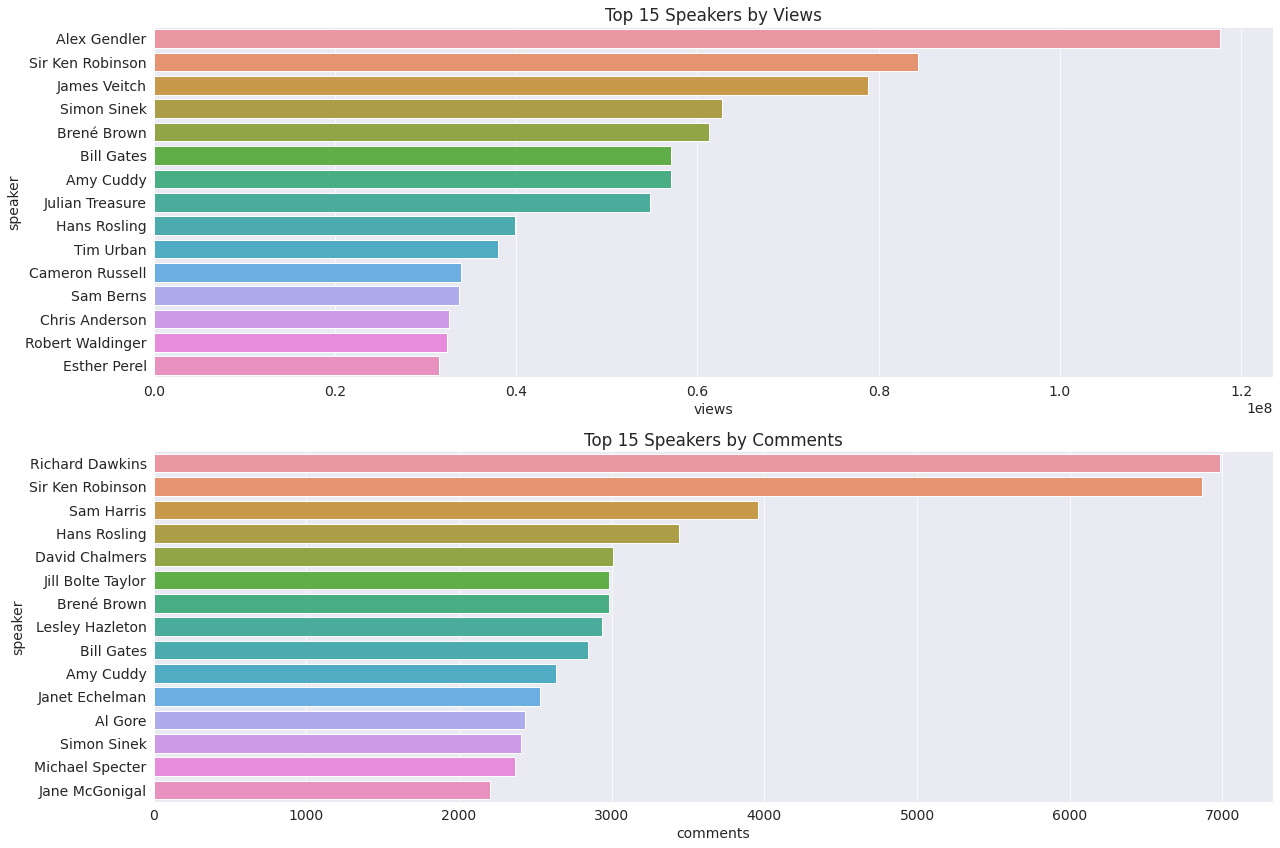

In [ ]:
# create a dataframe with top 15 speakers by views
top15_views = tedtalks_df.groupby('speaker').views.sum().nlargest(15)
top15_views = top15_views.reset_index()

# create a dataframe with top 15 speakers by comments
top15_comments = tedtalks_df.groupby('speaker').comments.sum().nlargest(15)
top15_comments = top15_comments.reset_index()

# create the figure and subplots
fig, axs = plt.subplots(2,1, figsize=(18,12))

# create a barplot with top 15 speakers by views
sns.barplot(x='views', y='speaker', data=top15_views, ax=axs[0])
axs[0].set_title('Top 15 Speakers by Views')

# create a barplot with top 15 speakers by comments
sns.barplot(x='comments', y='speaker', data=top15_comments, ax=axs[1])
axs[1].set_title('Top 15 Speakers by Comments')


plt.tight_layout()
plt.show()


In [ ]:
# unique speakers count of TEDX

len(tedtalks_df['speaker'].unique())

3271

**observations :-**
- in top 15 most popular speakers by views and comments there are total 6 speakers are same in both categories.
- i think we add new categorical column using speakers by popularity wise categorical column ex. good,avg,high,extreme popular using cooments and views column but after perform feature engineering. (outliers, null values etc...)

In [ ]:
# check skewness of our numerical columns

tedtalks_df.skew()

views       8.184312
comments    9.158308
duration    1.186224
dtype: float64

- now, we focus on numerical columns first and deal with outliers, null values and then check skewness of the columns.

### **`comments`**

<AxesSubplot:xlabel='comments', ylabel='views'>

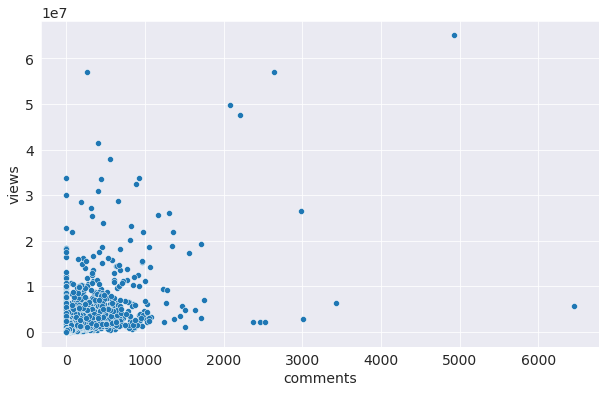

In [ ]:
#checking corr. with views column

plt.figure(figsize=(10,6))
sns.scatterplot(x='comments', y='views', data=tedtalks_df)


**Observations :-**
- From the above graph it is clear that comments and views both are rightly skewed and they both have somewhat of a similar distributions. This might signify some linear correlation.

- Also as previously seen comments have a lot of NaN values and also distribution is highly skewed to the right side indicating some outliers. So lets deal with those issues too.

<AxesSubplot:xlabel='comments', ylabel='Density'>

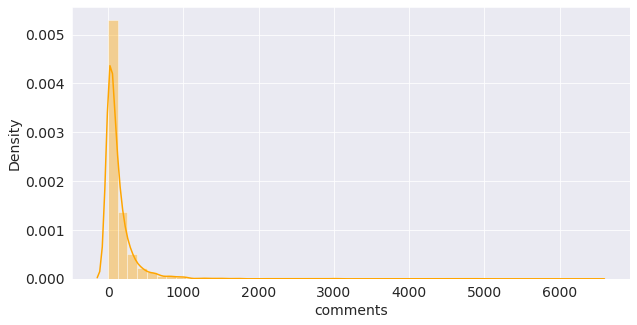

In [ ]:
# check distribution of comments column

plt.figure(figsize=(10,5))
sns.distplot(tedtalks_df['comments'], color ='orange')

**Observations :-**
- the comments column is also highly right skew..we have to apply log transformation when we make pipeline.
there are some outliers in this column we have to remove them or use some technique to fill that outliers with other values.

In [ ]:
print(len(tedtalks_df[tedtalks_df['comments'] > 1100]))

29


Note :-  we can clearly see in graph and upper code also that there are only 29 values are outliers


In [ ]:
#remove outliers of comments column

tedtalks_df.drop(tedtalks_df[tedtalks_df['comments'] > 1100].index, inplace=True)

In [ ]:
tedtalks_df.shape

(3970, 11)

In [ ]:
#fill null(0) value with median of column

tedtalks_df['comments']= tedtalks_df['comments'].replace(0, np.nan)
tedtalks_df["comments"].fillna(tedtalks_df["comments"].median(), axis = 0, inplace = True)

- we use median to fill null values because median is better than mean in case of outliers so...

<AxesSubplot:xlabel='comments', ylabel='Density'>

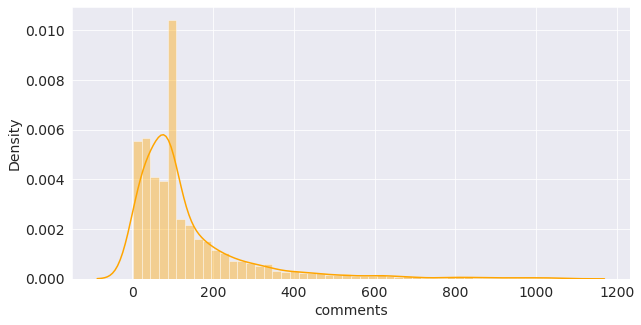

In [ ]:
# plot distplot after remove outliers and fill null values

plt.figure(figsize=(10,5))
sns.distplot(tedtalks_df['comments'], color ='orange')

**observations :-**

- after deal with outliers and null values now distribution of column comments are right skewed.

### **`views`**

<AxesSubplot:xlabel='views', ylabel='Density'>

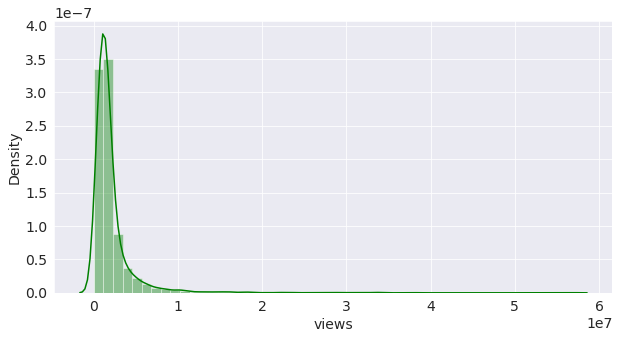

In [ ]:
  # check distribution of views column

  plt.figure(figsize=(10,5))
  sns.distplot(tedtalks_df['views'], color ='green')

**Observations :-**
- the views column is highly right skew..we have to apply log transformation when we make pipeline.
- there are some outliers in this column we have to remove them or use some technique to fill that outliers with other values.

### **`duration`**

<AxesSubplot:xlabel='duration', ylabel='Density'>

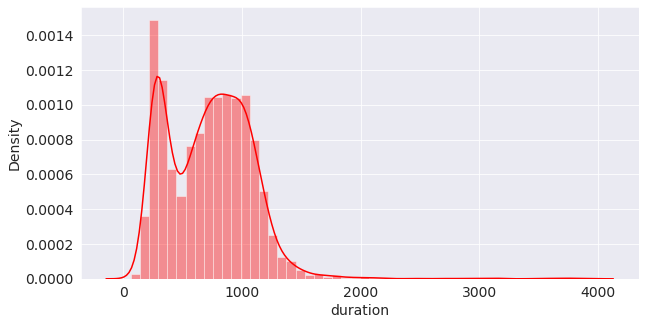

In [ ]:
# check distribution of duration column

plt.figure(figsize=(10,5))
sns.distplot(tedtalks_df['duration'], color ='red')

<AxesSubplot:xlabel='duration', ylabel='views'>

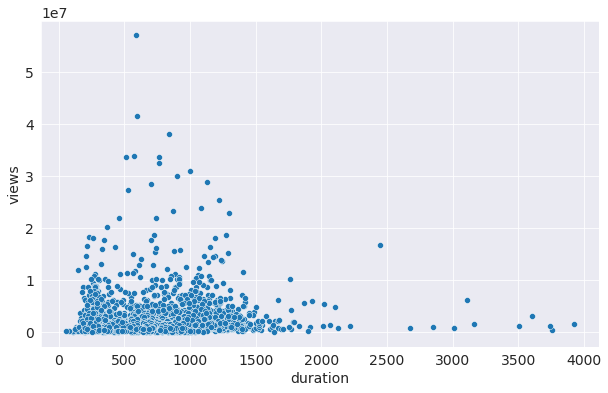

In [ ]:
# check correlation of duration and views using scatter plot

plt.figure(figsize=(10,6))
sns.scatterplot(x='duration', y='views', data=tedtalks_df)

- **observations :-**

- From the above graph it is clear that duration and views columns are not    correlated to each other.
- in duration column also some outlier there.

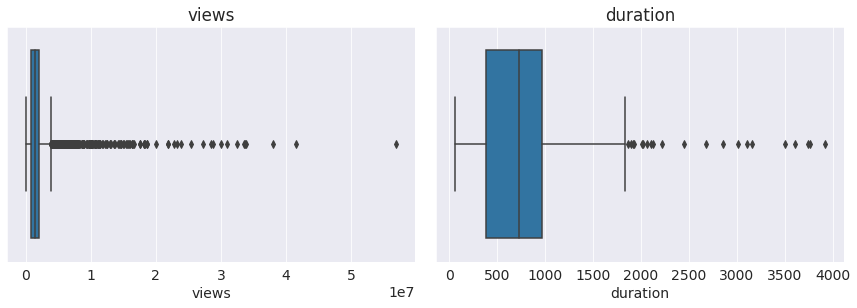

In [ ]:
# checking duration and views columns Outliers using boxplot

columns = ['views', 'duration']
n = 1
plt.figure(figsize=(18,12))

for i in columns:
  plt.subplot(3,3,n)
  n=n+1
  sns.boxplot(tedtalks_df[i])
  plt.title(i)
  plt.tight_layout()

In [ ]:
# treatment outliers by mean

columns = ['views', 'duration']

for i in columns:
  iqr =  tedtalks_df[i].quantile(0.75)-tedtalks_df[i].quantile(0.25)
  tedtalks_df[i] = tedtalks_df[i].mask(tedtalks_df[i]>(tedtalks_df[i].quantile(0.75)+1.5*iqr), tedtalks_df[i].mean())

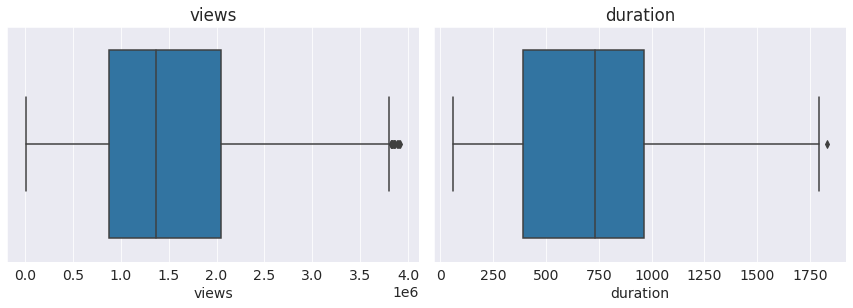

In [ ]:
#let's see the numerical column again after treating outliers

columns = ['views', 'duration']
n = 1
plt.figure(figsize=(18,12))

for i in columns:
  plt.subplot(3,3,n)
  n=n+1
  sns.boxplot(tedtalks_df[i])
  plt.title(i)
  plt.tight_layout()

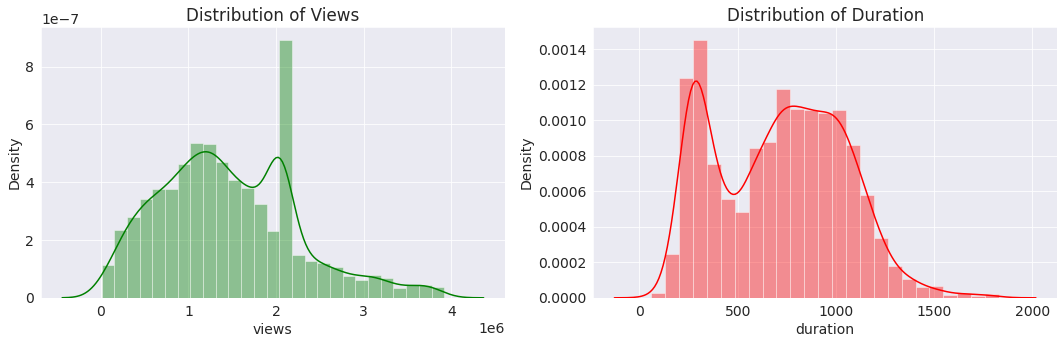

In [ ]:
# after fill outliers with mean... distribution graph of columns views and duration

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

sns.distplot(tedtalks_df['views'], color='green', ax=axs[0])
axs[0].set_title('Distribution of Views')

sns.distplot(tedtalks_df['duration'], color='red', ax=axs[1])
axs[1].set_title('Distribution of Duration')


plt.tight_layout()
plt.show()

**`observations` :-**

- after fill outliers with mean... views column is little bit right skewed with normal distribution.
- and for duration column are bi-model type distribution.

In [ ]:
# change duration in sec. to min.

tedtalks_df['duration'] = tedtalks_df['duration'] / 60

In [ ]:
#check skewness of our numerical columns

tedtalks_df.skew()

views       0.556902
comments    2.779550
duration    0.143467
dtype: float64

- all good right now, we focus more on all this numerical columns later on and apply function or power transformation using column transformer when we make pipeline.

In [ ]:
# plot 3D scatter plot of comments, duration and our target column views using plotly library.

fig = px.scatter_3d(tedtalks_df, x=tedtalks_df['duration'], y=tedtalks_df['comments'], z=tedtalks_df['views'])

fig.show()

**observations :-**

- we can clearly see that when comments value high in 600 to 1000 side views value also increases.

- but in duration time increase or decrease there are not any changes in views values.

In [ ]:
# Create a new column 'speaker_popularity' in the main DataFrame and assign the categories

tedtalks_df['speaker_popularity'] = ""
tedtalks_df.loc[tedtalks_df['views'] <= 500000, 'speaker_popularity'] = 'not_popular'
tedtalks_df.loc[(tedtalks_df['views'] > 500000) & (tedtalks_df['views'] <= 1500000), 'speaker_popularity'] = 'avg_popular'
tedtalks_df.loc[(tedtalks_df['views'] > 1500000) & (tedtalks_df['views'] <= 2500000), 'speaker_popularity'] = 'popular'
tedtalks_df.loc[(tedtalks_df['views'] > 2500000) & (tedtalks_df['views'] <= 3500000), 'speaker_popularity'] = 'high_popular'
tedtalks_df.loc[tedtalks_df['views'] > 3500000, 'speaker_popularity'] = 'extreme_popular'

# check the dataset

tedtalks_df.sample(2)

title       speaker  \
2095  Why your doctor should care about social justice  Mary Bassett   
899                              How to tie your shoes   Terry Moore   

             views recorded_date published_date        event native_lang  \
2095  1.209081e+06    2015-11-18     2016-02-25  TEDMED 2015          en   
899   2.051773e+06    2005-02-02     2011-05-20      TED2005          en   

                                         available_lang  comments   duration  \
2095  ['ar', 'de', 'el', 'en', 'es', 'fa', 'fr', 'he...      64.0  13.816667   
899   ['ar', 'az', 'bg', 'bn', 'bo', 'bs', 'ca', 'cs...     333.0   2.983333   

                                                 topics speaker_popularity  
2095  ['Africa', 'big problems', 'AIDS', 'disease', ...        avg_popular  
899                ['culture', 'demo', 'entertainment']            popular

<AxesSubplot:xlabel='speaker_popularity', ylabel='comments'>

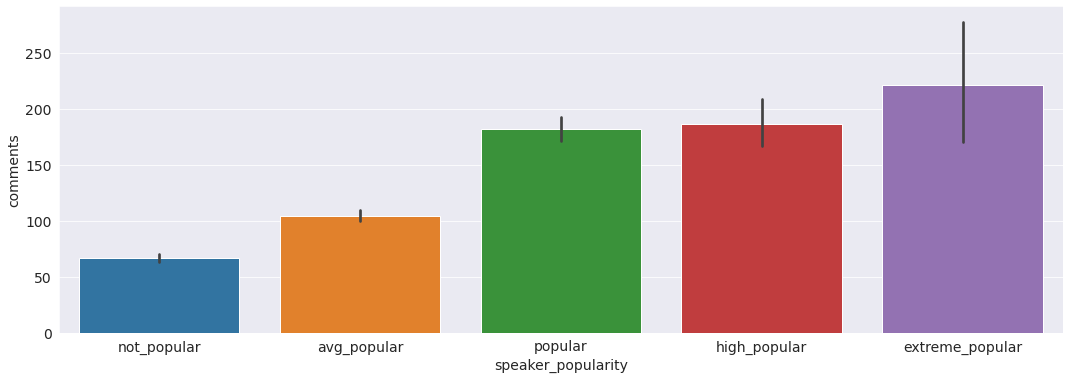

In [ ]:
plt.figure(figsize=(18,6))
sns.barplot(data=tedtalks_df, x='speaker_popularity', y='comments',
            order=['not_popular', 'avg_popular', 'popular', 'high_popular', 'extreme_popular'])


**observations :-**

- We can observe that this speaker popularity column has a strong correlation with the comments column in an ordinal manner. This means that as the number of comments on a TED Talk video increases, the popularity of the speaker also tends to increase.

- Based on this observation, we can say that the number of views for a TED Talk video is also predictable in certain scenarios.

- However, there are no other good columns available in the dataset that can be modified or used to create new columns for better prediction models.

- To improve the prediction model, we can consider including features such as speaker ratings on TED Talks, similar to how there are rating systems for instructors in ALMAbetter.

- These ratings can help in understanding the quality of the talk and the popularity of the speaker, which could be important factors in predicting the number of views.

In [ ]:
# Create a new column 'video_rating' in the main DataFrame and assign the categories

tedtalks_df['video_rating'] = ""
tedtalks_df.loc[tedtalks_df['comments'] <= 50, 'video_rating'] = 1
tedtalks_df.loc[(tedtalks_df['comments'] > 50) & (tedtalks_df['comments'] <= 120), 'video_rating'] = 2
tedtalks_df.loc[(tedtalks_df['comments'] > 120) & (tedtalks_df['comments'] <= 200), 'video_rating'] = 3
tedtalks_df.loc[(tedtalks_df['comments'] > 200) & (tedtalks_df['comments'] <= 300), 'video_rating'] = 4
tedtalks_df.loc[tedtalks_df['comments'] > 300, 'video_rating'] = 5

# check the dataset
tedtalks_df.sample(2)


title       speaker      views recorded_date  \
3180  If superpowers were real: Flight       Joy Lin  1902085.0    2013-06-27   
3231       Is it bad to hold your pee?  Heba Shaheed  2866391.0    2016-10-10   

     published_date   event native_lang  \
3180     2019-02-12  TED-Ed          en   
3231     2019-02-22  TED-Ed          en   

                                         available_lang  comments  duration  \
3180  ['ar', 'de', 'en', 'es', 'fr', 'he', 'it', 'ja...      88.0  4.550000   
3231  ['ar', 'cs', 'de', 'en', 'es', 'fa', 'fr', 'he...      88.0  3.716667   

                                                 topics speaker_popularity  \
3180  ['animation', 'TED-Ed', 'science', 'physics', ...            popular   
3231  ['health', 'public health', 'human body', 'TED...       high_popular   

     video_rating  
3180            2  
3231            2

**observations :-**

- One of the main ways people engage with content on social media platforms, including video sharing platforms like YouTube, is by leaving comments.
Comments can be a measure of engagement and audience interest in the content, as people who leave comments are often invested in the topic and want to express their thoughts or feedback.

- In the case of TED Talks, comments can be an indicator of the quality and impact of the speaker's presentation, as well as the relevance and resonance of the topic with the audience.

- Therefore, it can be hypothesized that videos with higher comments are more likely to be well-received and impactful, and thus may be rated more highly by viewers.

- Based on this idea, we can create a new column 'video_rating' in the dataset, which can be assigned rating based on the number of comments a talk has received.

### **`available language`**

In [ ]:
# add new column available_languages using existing column available_lang

tedtalks_df['available_languages'] = tedtalks_df['available_lang'].apply(lambda x: len(x))
pd.DataFrame(tedtalks_df['available_languages'])

available_languages
0                     270
1                     303
2                     165
3                     219
5                     123
...                   ...
3999                   27
4000                    6
4001                   27
4002                    6
4003                    6

[3970 rows x 1 columns]

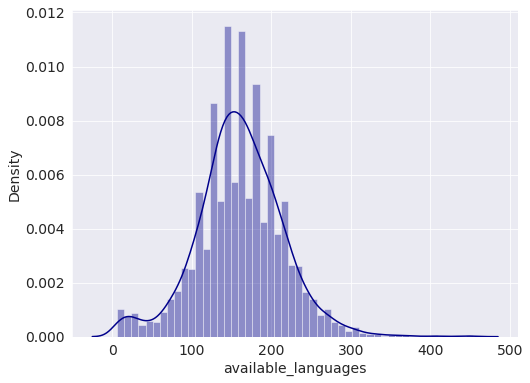

In [ ]:
# check the distribution of this new column available_languages

plt.figure(figsize=(8,6))
sns.distplot(tedtalks_df['available_languages'],color = 'darkblue')
plt.show()

- little-bit of right skewed and in-middle also more values...we can use function transformation or power transformation on later part when we make pipeline.

### **`published_date`**

In [ ]:
# Making seperate column for day, month and year of upload

tedtalks_df['published_year'] = tedtalks_df['published_date'].dt.year
tedtalks_df['published_month'] = tedtalks_df['published_date'].dt.month
tedtalks_df['published_day'] = tedtalks_df["published_date"].dt.day_name()

# storing weekdays in order of numbers from 0 to 6 value

daydict = {'Sunday' : 0, 'Monday' : 1, 'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6}

# making new column holding information of day number

tedtalks_df['published_daynumber'] = tedtalks_df['published_day'].map(daydict)

In [ ]:
# add one more column published_months_ago

tedtalks_df['published_months_ago'] = ((2023 - tedtalks_df['published_year'])*12 + tedtalks_df['published_month'])

In [ ]:
tedtalks_df.sample(1)

title     speaker      views recorded_date  \
2432  Why our screens make us less happy  Adam Alter  3790199.0    2017-04-24   

     published_date    event native_lang  \
2432     2017-07-14  TED2017          en   

                                         available_lang  comments  duration  \
2432  ['ar', 'cs', 'de', 'en', 'es', 'fa', 'fr', 'he...      72.0  9.483333   

                                                 topics speaker_popularity  \
2432  ['computers', 'addiction', 'interface design',...    extreme_popular   

     video_rating  available_languages  published_year  published_month  \
2432            2                  213            2017                7   

     published_day  published_daynumber  published_months_ago  
2432        Friday                    5                    79

### **`event`**

In [ ]:
# there are lot of TED events

print(tedtalks_df['event'].value_counts().head(10))

TED-Ed            555
TED2018            96
TED2017            96
TED2019            91
TED2014            83
TED2009            80
TED2016            75
TED2015            74
TED2013            72
TEDGlobal 2012     69
Name: event, dtype: int64


In [ ]:
# add new column of each TED event type using existing column event

ted_categories = ['TED-Ed','TEDx', 'TED', 'TEDGlobal', 'TEDSummit', 'TEDWomen', 'TED Residency']


tedtalks_df['TEDevent_type'] = tedtalks_df['event'].map(lambda x: "TEDx" if x[0:4] == "TEDx" else x)
tedtalks_df['TEDevent_type'] = tedtalks_df['TEDevent_type'].map(lambda x: "TED-Ed" if x[0:4] == "TED_Ed" else x)
tedtalks_df['TEDevent_type'] = tedtalks_df['TEDevent_type'].map(lambda x: "TED" if x[0:4] == "TED2" else x)
tedtalks_df['TEDevent_type'] = tedtalks_df['TEDevent_type'].map(lambda x: "TEDGlobal" if x[0:4] == "TEDG" else x)
tedtalks_df['TEDevent_type'] = tedtalks_df['TEDevent_type'].map(lambda x: "TEDWomen" if x[0:4] == "TEDW" else x)
tedtalks_df['TEDevent_type'] = tedtalks_df['TEDevent_type'].map(lambda x: "TEDSummit" if x[0:4] == "TEDS" else x)
tedtalks_df['TEDevent_type'] = tedtalks_df['TEDevent_type'].map(lambda x: "TED Residency" if x[0:13] == "TED Residency" else x)
tedtalks_df['TEDevent_type'] = tedtalks_df['TEDevent_type'].map(lambda x: "Other TED" if x not in ted_categories else x)


In [ ]:
tedtalks_df.sample(1)

title              speaker  \
3109  The biology of gender, from DNA to the brain  Karissa Sanbonmatsu   

          views recorded_date published_date          event native_lang  \
3109  2296725.0    2018-11-28     2019-01-10  TEDWomen 2018          en   

                                         available_lang  comments   duration  \
3109  ['ar', 'cs', 'en', 'es', 'fa', 'fi', 'fr', 'he...     182.0  12.866667   

                                                 topics speaker_popularity  \
3109  ['genetics', 'gender', 'gender equality', 'ide...            popular   

     video_rating  available_languages  published_year  published_month  \
3109            3                  153            2019                1   

     published_day  published_daynumber  published_months_ago TEDevent_type  
3109      Thursday                    4                    49      TEDWomen

In [ ]:
# check the all events talkshows counts

pd.DataFrame(tedtalks_df['TEDevent_type'].value_counts()).reset_index()

index  TEDevent_type
0            TED           1160
1           TEDx            689
2      Other TED            677
3         TED-Ed            555
4      TEDGlobal            510
5       TEDWomen            194
6      TEDSummit            145
7  TED Residency             40

### **`topics`**

In [ ]:
import ast

# use duplicate dataframe for topics analysis
df = tedtalks_df.copy()

df['topics'] = df['topics'].apply(lambda x: ast.literal_eval(x))
s = df.apply(lambda x: pd.Series(x['topics']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'topic'

df = df.drop('topics', axis=1).join(s)

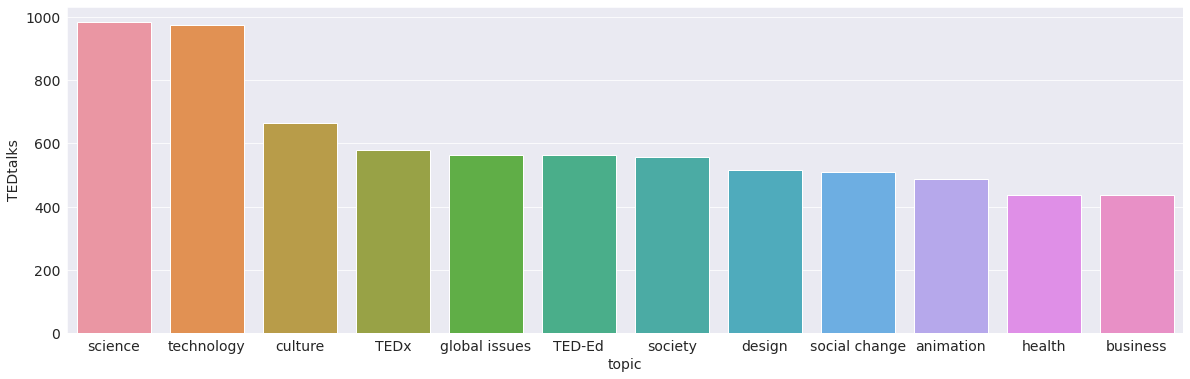

In [ ]:
# plot a bar chart of popular topics of TEDx Website

pop_topic = pd.DataFrame(df['topic'].value_counts()).reset_index()
pop_topic.columns = ['topic', 'TEDtalks']

plt.figure(figsize=(20,6))
sns.barplot(x='topic', y='TEDtalks', data=pop_topic.head(12))
plt.show()

**observations :-**
- As may have been expected, science and Technology is the most popular topics for talks. Culture and Global Issues are also the popular topics respectively.

- The next question I want to answer is the trends in the share of topics of TED Talks across the world. Has the demand for Technology talks increased? Do certain years have a disproportionate share of talks related to global issues? Let's find out!

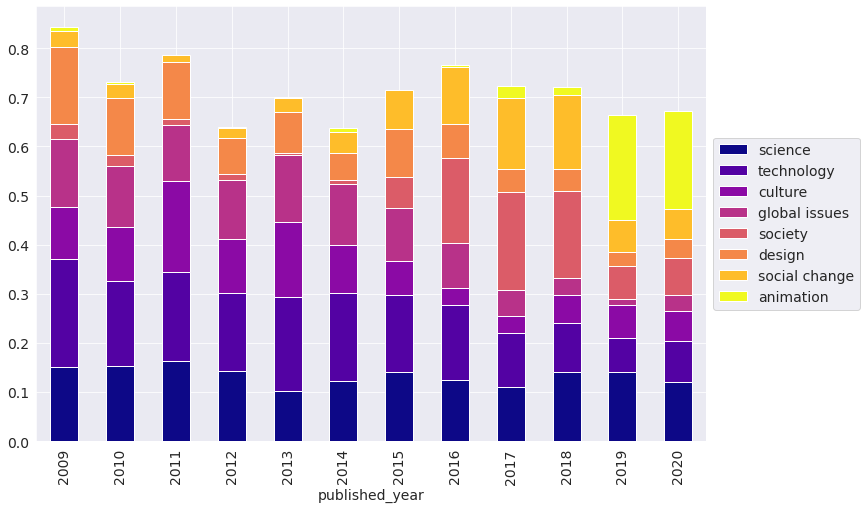

In [ ]:
# plot the stacked bar charts of top 8 topics over the year and check trend

pop_theme_talks = df[(df['topic'].isin(pop_topic.head(12)['topic'])) & (df['topic'] != ('TEDx','TED-Ed'))]
pop_theme_talks['published_year'] = pop_theme_talks['published_year'].astype('int')
pop_theme_talks = pop_theme_talks[pop_theme_talks['published_year'] > 2008]


themes = list(pop_topic.head(10)['topic'])
themes.remove('TEDx')
themes.remove('TED-Ed')

ctab = pd.crosstab([pop_theme_talks['published_year']], pop_theme_talks['topic']).apply(lambda x: x/x.sum(), axis=1)
ctab[themes].plot(kind='bar', stacked=True, colormap='plasma', figsize=(12,8)).legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

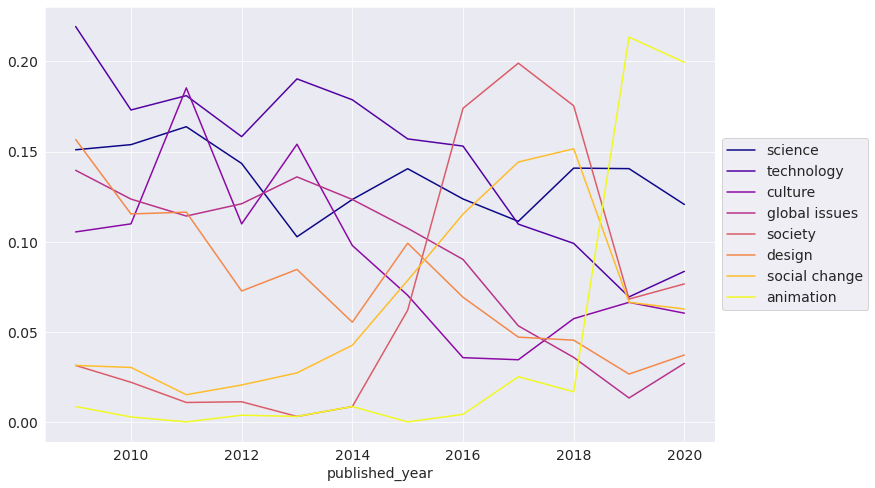

In [ ]:
# plot line charts for top 8 topics perform over the year

ctab[themes].plot(kind='line', stacked=False, colormap='plasma', figsize=(12,8)).legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

**observations:-**
- The technology talks has steadily decreased over the years but technology is #1 over the years and then after 2018 animation talks take place. This is understandable considering the boom of gaming industries and also boom of  technology such as blockchain, deep learning and augmented with reality capturing people's imagination.

- there are lot of discussion and topics in one TEDtalks so we can not make new column from this i tried but the other rows are duplicated and if we create broader categories because some topics may fit into multiple tags, so there might be some overlap issue.



## **features Selection**

In [ ]:
tedtalks_df.sample(2)

title        speaker      views  \
3135  Can you solve the vampire hunter riddle?  Daniel Finkel  1535329.0   
1150                    Half a million secrets   Frank Warren  3315222.0   

     recorded_date published_date    event native_lang  \
3135    2019-01-28     2019-01-28   TED-Ed          en   
1150    2012-02-29     2012-04-09  TED2012          en   

                                         available_lang  comments   duration  \
3135  ['ar', 'en', 'es', 'fa', 'fr', 'he', 'hu', 'ja...      88.0   3.533333   
1150  ['ar', 'bg', 'cs', 'da', 'de', 'el', 'en', 'es...     171.0  11.400000   

                                                 topics speaker_popularity  \
3135                    ['math', 'TED-Ed', 'animation']            popular   
1150  ['creativity', 'design', 'memory', 'storytelli...       high_popular   

     video_rating  available_languages  published_year  published_month  \
3135            2                  105            2019                1   
1150            3                  255            2012                4   

     published_day  published_daynumber  published_months_ago TEDevent_type  
3135        Monday                    1                    49        TED-Ed  
1150        Monday                    1                   136           TED

In [ ]:
# dropping unneccessary columns

tedtalks_df.drop(labels = ["speaker", "title", "recorded_date", "published_date", "event", "native_lang", "available_lang", "topics"],axis = 1, inplace = True)

In [ ]:
tedtalks_df.sample(1)

views  comments   duration speaker_popularity video_rating  \
367  1372525.0     148.0  13.816667        avg_popular            3   

     available_languages  published_year  published_month published_day  \
367                  141            2009                1        Monday   

     published_daynumber  published_months_ago TEDevent_type  
367                    1                   169           TED

In [ ]:
# again change data-types of columns

tedtalks_df = tedtalks_df.astype({'comments':'int64', 'views':'int64','video_rating':'int64'})

tedtalks_df = tedtalks_df.astype({
    'speaker_popularity': 'category',
    'published_day': 'category',
    'TEDevent_type': 'category'
})

In [ ]:
tedtalks_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3970 entries, 0 to 4003
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   views                 3970 non-null   int64   
 1   comments              3970 non-null   int64   
 2   duration              3970 non-null   float64 
 3   speaker_popularity    3970 non-null   category
 4   video_rating          3970 non-null   int64   
 5   available_languages   3970 non-null   int64   
 6   published_year        3970 non-null   int64   
 7   published_month       3970 non-null   int64   
 8   published_day         3970 non-null   category
 9   published_daynumber   3970 non-null   int64   
 10  published_months_ago  3970 non-null   int64   
 11  TEDevent_type         3970 non-null   category
dtypes: category(3), float64(1), int64(8)
memory usage: 451.7 KB


**Now, lets have a look at the new correlation map.**

<AxesSubplot:>

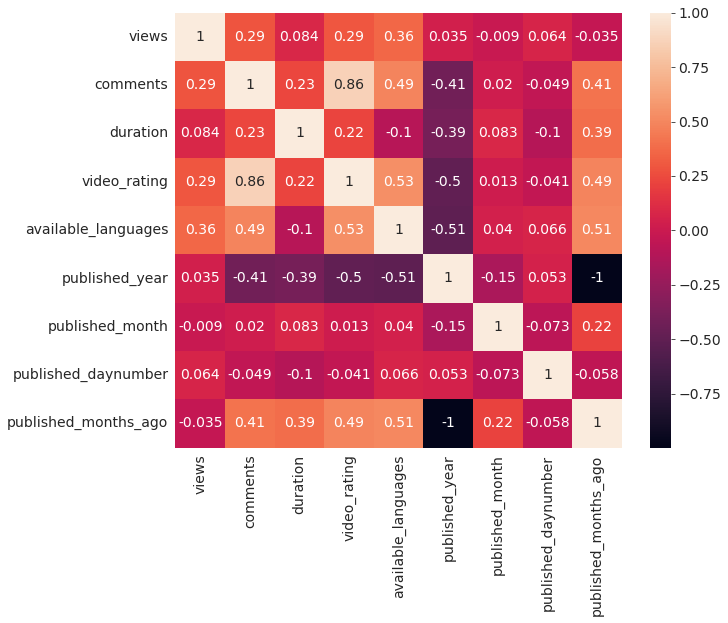

In [ ]:
# Plotting correlation  matrix for all features with respect to target variable
correlmap = tedtalks_df.corr()
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(correlmap, annot=True, ax = ax)

**`NOTE :-`**
-  we have to predict the dependent column (views) so we can not modify or make new column out of this example like per_year_views , related_topic_views, daily_views etc..

- comments and available_languages are most correlated with views column.

- we have also some best categorical columns like speaker_popularity and TEDevent_type that help our model to predict more accurate.

## **Remove Multicollinearity**

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# create a new DataFrame with only numeric columns
numeric_cols = tedtalks_df.select_dtypes(include=['int64', 'int32', 'float32', 'float64']).drop(['views'], axis=1)

# calculate VIF for each column
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(numeric_cols.values, i) for i in range(numeric_cols.shape[1])]
vif["features"] = numeric_cols.columns

# print the results
vif

VIF Factor              features
0    3.986144              comments
1    1.466538              duration
2    4.396817          video_rating
3    1.963107   available_languages
4   26.689569        published_year
5    4.416672       published_month
6    1.025867   published_daynumber
7   11.787367  published_months_ago

- The columns published_year and published_months_ago are highly correlated with each other and have high VIF. We can remove one of these columns and check VIF again.

In [ ]:
# Step 1: drop published_months_ago column

tedtalks_df.drop(['published_year','published_month', 'published_months_ago','video_rating'], axis=1, inplace=True)


# Step 2: calculate VIF

numeric_cols = tedtalks_df.select_dtypes(include=['int64', 'int32', 'float32', 'float64']).drop(['views'], axis=1)
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(numeric_cols.values, i) for i in range(numeric_cols.shape[1])]
vif["features"] = numeric_cols.columns


# print the results

vif


VIF Factor             features
0    2.383419             comments
1    3.886106             duration
2    6.844579  available_languages
3    4.338249  published_daynumber

In [ ]:
tedtalks_df.sample(1)

views  comments  duration speaker_popularity  available_languages  \
3895  188831         3  3.016667        not_popular                   60   

     published_day  published_daynumber TEDevent_type  
3895        Monday                    1     Other TED

In [ ]:
# use Yeo - Johnson Transform for views column and then we train test split the data

pt = PowerTransformer()
tedtalks_df['views'] = pt.fit_transform(pd.DataFrame(tedtalks_df['views']))

In [ ]:
tedtalks_df.skew()

views                 -0.059045
comments               2.779550
duration               0.143467
available_languages    0.102257
published_daynumber   -0.025308
dtype: float64

- power transformer is really good option so we apply also on comments, duration, available_languages when we make pipeline using column transformer.
(i checked all column individually and after applying power transformer skewness is decreased and give results very close to 0.)

# **model implementation and pre-processing**

## **`Train, Test and Split`**

In [ ]:
# split the Dataset into independent(x) and dependent(y) Dataset

X = tedtalks_df.drop(columns=['views'])
y = tedtalks_df['views']

In [ ]:
# display independent variables dataframe

X

comments   duration speaker_popularity  available_languages  \
0          272  16.283333    extreme_popular                  270   
1          628  19.833333            popular                  303   
2          124  21.433333            popular                  165   
3          219  18.600000       high_popular                  219   
5           48  19.966667        avg_popular                  123   
...        ...        ...                ...                  ...   
3999        37  15.683333        avg_popular                   27   
4000         6  11.500000        avg_popular                    6   
4001        88   5.766667        not_popular                   27   
4002         9  12.900000        not_popular                    6   
4003        88   4.283333        not_popular                    6   

     published_day  published_daynumber TEDevent_type  
0          Tuesday                    2           TED  
1          Tuesday                    2           TED  
2          Tuesday                    2           TED  
3          Tuesday                    2           TED  
5           Monday                    1           TED  
...            ...                  ...           ...  
3999        Friday                    5           TED  
4000        Monday                    1           TED  
4001        Monday                    1        TED-Ed  
4002       Tuesday                    2          TEDx  
4003      Thursday                    4        TED-Ed  

[3970 rows x 7 columns]

In [ ]:
# display dependent variable dataframe

y

0       2.210515
1       0.796459
2       0.653858
3       1.421228
5      -0.201608
          ...   
3999   -0.844023
4000   -1.283922
4001   -1.681121
4002   -1.356506
4003   -2.408524
Name: views, Length: 3970, dtype: float64

In [ ]:
# calling train_test_split() to get the training and testing data.

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

# split sizes
print(X_train.shape)
print(X_test.shape)

(3176, 7)
(794, 7)


In [ ]:
tedtalks_df.sample(2)

views  comments   duration speaker_popularity  available_languages  \
3974 -0.683651        37  11.800000        avg_popular                   30   
2172  0.080454        64   8.083333        avg_popular                  159   

     published_day  published_daynumber TEDevent_type  
3974        Friday                    5          TEDx  
2172        Friday                    5           TED

## **Data pre-processing using ColumnTransformer for make Pipeline**


In [ ]:
# using column transformer to make step1 of scaling, encoding, function transformer, imputer etc to build pipelines.

step1 = ColumnTransformer(transformers=[
    ('col_tnf', StandardScaler(),[0,1,3,5]),
    ('col_tnf1', PowerTransformer(),[0,1,3]),
    ('col_tnf2', OneHotEncoder(sparse=False, drop='first'),[4,6]),
    ('col_tnf3', OrdinalEncoder(categories=[['not_popular','avg_popular','popular','high_popular','extreme_popular']]),[2])
],remainder='passthrough')



# display pipeline

from sklearn import set_config
set_config(display='diagram')

By utilizing a ColumnTransformer, we can efficiently apply multiple pre-processing steps, such as scaling, encoding and function transformation, to our data in a single step. This simplifies the pre-processing phase and allows us to build pipelines with different algorithms, performing hyperparameter tuning to find the best results for our model.

---

## **`Linear Regression`**

Linear Regression is a supervised machine learning algorithm where the predicted output is continuous and has a constant slope. It’s used to predict values within a continuous range, rather than trying to classify them into categories. There are two main types:

**Simple regression :-**

Simple linear regression involves just two variables - one dependent variabl(y) and one independent variable(x). The algorithm tries to learn the best values for the slope (m) and intercept (b) of a straight line that can accurately predict the dependent variable based on the independent variable. Linear regression can predict the output by fitting a straight line in the case of simple linear regression.

y=mx+b

**Multivariable regression :-**

Multivariable regression, on the other hand, involves more than two variables. It's used when there are multiple independent variables that can be used to predict a single dependent variable. In this case, the algorithm tries to learn the best values for the weights (w1, w2, w3, etc.) associated with each independent variable, in order to accurately predict the dependent variable.
Linear regression can predict the output by fitting a straight line in the case of Multivariable regression

f(x,y,z)=w1x+w2y+w3z

In [ ]:
# apply LinearRegression algorithm as step2

step2 = LinearRegression()


# make pipeline
pipe1 = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

# fit the pipeline on training dataset
pipe1.fit(X_train,y_train)

# predict the train and test dataset
y_pred_train = pipe1.predict(X_train)
y_pred = pipe1.predict(X_test)

# display pipeline diagram
display(pipe1)

# LinearRegression model all output scores
print('\033[1mTraining data R2 and Adjusted R2 Score\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('R2 score',r2_score(y_train,y_pred_train))
print('Adjusted R2 score', (1-(1-r2_score(y_train,y_pred_train))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))))

print('\n')
print('\033[1mTesting data R2 and Adjusted R2 Score\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('R2 score',r2_score(y_test,y_pred))
print('Adjusted R2 score', (1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))))

print('\n')
print('\033[1mThe performance metrics\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('MAE',mean_absolute_error(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred)))

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_tnf', StandardScaler(),
                                                  [0, 1, 3, 5]),
                                                 ('col_tnf1',
                                                  PowerTransformer(),
                                                  [0, 1, 3]),
                                                 ('col_tnf2',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  [4, 6]),
                                                 ('col_tnf3',
                                                  OrdinalEncoder(categories=[['not_popular',
                                                                              'avg_popular',
                                                                              'popular',
                                                                              'high_popular',
                                                                              'extreme_popular']]),
                                                  [2])])),
                ('step2', LinearRegression())])

Training data R2 and Adjusted R2 Score
-----------------------------------------
R2 score 0.8875932815467346
Adjusted R2 score 0.8873449081158088


Testing data R2 and Adjusted R2 Score
-----------------------------------------
R2 score 0.8883995496152228
Adjusted R2 score 0.8874056524743915


The performance metrics
-----------------------------------------
MAE 0.2779538840029754
MSE 0.1152750515503316
RMSE 0.33952179834339297


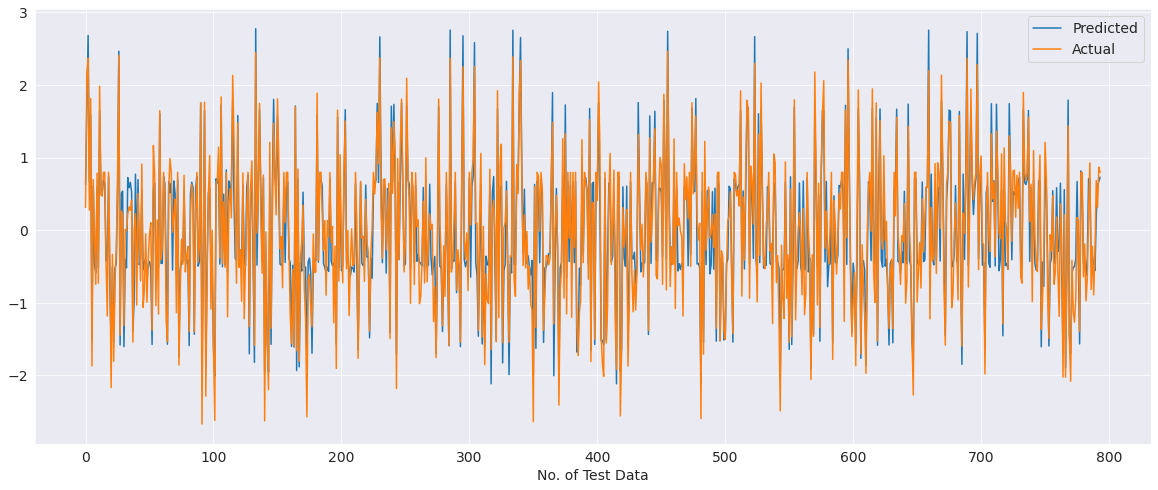

In [ ]:
# Plot the figure
plt.figure(figsize=(20,8))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No. of Test Data')
plt.show()

---

## **`Ridge Regression(L2) with hyperparameter tuning`**

- In Ridge regression, we add a penalty term which is equal to the square of the coefficient. The L2 term is equal to the square of the magnitude of the coefficients. We also add a coefficient lambda to control that penalty term. In this case if lambda is zero then the equation is the basic OLS else if lambda > 0 then it will add a constraint to the coefficient. As we increase the value of lambda(Alpha) this constraint causes the value of the coefficient to tend towards zero but not exectly Zero. This leads to tradeoff of higher bias (dependencies on certain coefficients tend to be 0 and on certain coefficients tend to be very large, making the model less flexible) for lower variance.

**Limitation of Ridge Regression :-**
- Ridge regression decreases the complexity of a model but does not reduce the number of variables since it never leads to a coefficient been zero rather only minimizes it. Hence, this model is not good for feature reduction or feature selection.

In [ ]:
# apply RidgeRegression algorithm with hyperparameter tuning as step2


# giving parameters
parameters = {'alpha': [1e-8,1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1,3,5,8,12,15,18,21,25]}

# we use gridsearchCV because the dataset is not that big so we use this not RandomizedSearchCV
Reg_ridge = GridSearchCV(Ridge(), parameters, cv=10)

step2 = Reg_ridge

# make pipeline
pipe2 = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

# fit the pipeline on training dataset
pipe2.fit(X_train,y_train)

# predict the train and test dataset
y_pred_train = pipe2.predict(X_train)
y_pred = pipe2.predict(X_test)

# display pipeline diagram
display(pipe2)

# Ridge Regression model all output scores
print('\033[1mTraining data R2 and Adjusted R2 Score\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('R2 score',r2_score(y_train,y_pred_train))
print('Adjusted R2 score', (1-(1-r2_score(y_train,y_pred_train))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))))

print('\n')
print('\033[1mTesting data R2 and Adjusted R2 Score\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('R2 score',r2_score(y_test,y_pred))
print('Adjusted R2 score', (1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))))

print('\n')
print('\033[1mCross-validation score and best params\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print("The best parameters is", Reg_ridge.best_params_)
print('cross-validation score', Reg_ridge.best_score_)

print('\n')
print('\033[1mThe performance metrics\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('MAE',mean_absolute_error(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred)))

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_tnf', StandardScaler(),
                                                  [0, 1, 3, 5]),
                                                 ('col_tnf1',
                                                  PowerTransformer(),
                                                  [0, 1, 3]),
                                                 ('col_tnf2',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  [4, 6]),
                                                 ('col_tnf3',
                                                  OrdinalEncoder(categories=[['not_popular',
                                                                              'avg_popular',
                                                                              'popular',
                                                                              'high_popular',
                                                                              'extreme_popular']]),
                                                  [2])])),
                ('step2',
                 GridSearchCV(cv=10, estimator=Ridge(),
                              param_grid={'alpha': [1e-08, 1e-07, 1e-06, 1e-05,
                                                    0.0001, 0.001, 0.01, 0.1, 1,
                                                    3, 5, 8, 12, 15, 18, 21,
                                                    25]}))])

Training data R2 and Adjusted R2 Score
-----------------------------------------
R2 score 0.8875908189819169
Adjusted R2 score 0.8873424401097179


Testing data R2 and Adjusted R2 Score
-----------------------------------------
R2 score 0.8883814863857914
Adjusted R2 score 0.8873874283765045


Cross-validation score and best params
-----------------------------------------
The best parameters is {'alpha': 0.001}
cross-validation score 0.8850230427023241


The performance metrics
-----------------------------------------
MAE 0.2779559358948607
MSE 0.11529370953689615
RMSE 0.3395492740927245


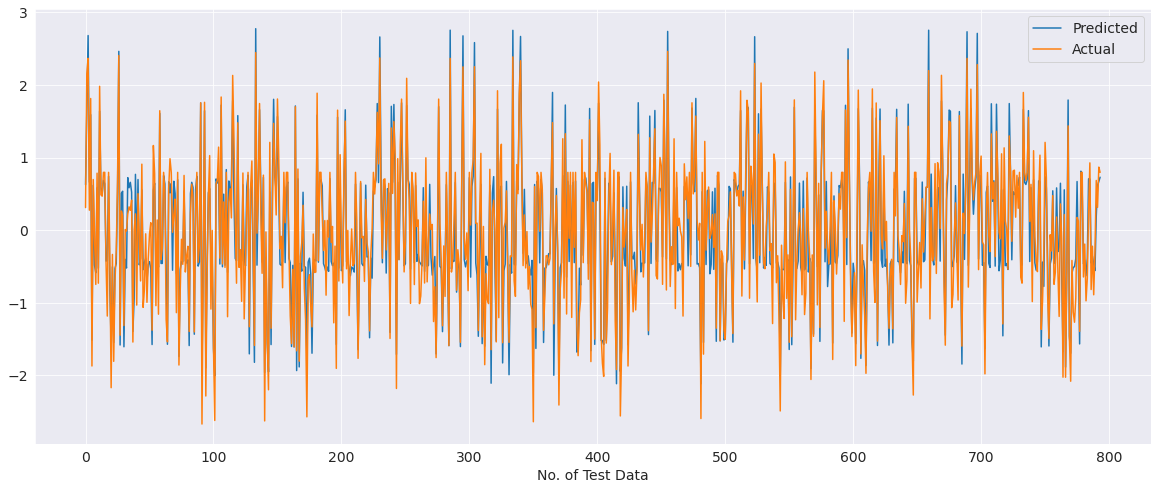

In [ ]:
# Plot the figure
plt.figure(figsize=(20,8))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No. of Test Data')
plt.show()

---

## **`Lasso Regression(L1) with hyperparameter tuning`**

- Lasso regression stands for Least Absolute Shrinkage and Selection Operator. It adds penalty term to the cost function. This term is the absolute sum of the coefficients. As the value of coefficients increases from 0 this term penalizes, cause model, to decrease the value of coefficients in order to reduce loss. The difference between ridge and lasso regression is that it tends to make coefficients to absolute zero as compared to Ridge which never sets the value of coefficient to absolute zero which means that Lasso regression can perform feature selection by eliminating features that have little or no effect on the target variable.

**Limitation of Lasso Regression :-**
- When the number of predictors is greater than the number of observations (p>n), Lasso may have difficulty in selecting relevant predictors. In such cases, Lasso may shrink some important predictors to zero or select some predictors randomly. This problem is known as the "Lasso Pathology" problem.

- Also, when there are highly correlated variables in the dataset, Lasso tends to select only one variable among them and ignore the others, which may result in losing important information. This issue is called the "Grouping Effect" or "Variable Selection Instability" problem.

In [ ]:
# apply LassoRegression algorithm with hyperparameter tuning as step2


# giving parameters
parameters = {'alpha': [1e-8,1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1,2,3,4,5,8,12,15,18,21,25]}

# we use gridsearchCV because the dataset is not that big so we use this not RandomizedSearchCV
Reg_Lasso = GridSearchCV(Lasso(), parameters, cv=10)

step2 = Reg_Lasso

# make pipeline
pipe3 = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

# fit the pipeline on training dataset
pipe3.fit(X_train,y_train)

# predict the train and test dataset
y_pred_train = pipe3.predict(X_train)
y_pred = pipe3.predict(X_test)

# display pipeline diagram
display(pipe3)

# Lasso Regression model all output scores
print('\033[1mTraining data R2 and Adjusted R2 Score\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('R2 score',r2_score(y_train,y_pred_train))
print('Adjusted R2 score', (1-(1-r2_score(y_train,y_pred_train))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))))

print('\n')
print('\033[1mTesting data R2 and Adjusted R2 Score\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('R2 score',r2_score(y_test,y_pred))
print('Adjusted R2 score', (1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))))

print('\n')
print('\033[1mCross-validation score and best params\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print("The best parameters is", Reg_Lasso.best_params_)
print('cross-validation score', Reg_Lasso.best_score_)

print('\n')
print('\033[1mThe performance metrics\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('MAE',mean_absolute_error(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred)))

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_tnf', StandardScaler(),
                                                  [0, 1, 3, 5]),
                                                 ('col_tnf1',
                                                  PowerTransformer(),
                                                  [0, 1, 3]),
                                                 ('col_tnf2',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  [4, 6]),
                                                 ('col_tnf3',
                                                  OrdinalEncoder(categories=[['not_popular',
                                                                              'avg_popular',
                                                                              'popular',
                                                                              'high_popular',
                                                                              'extreme_popular']]),
                                                  [2])])),
                ('step2',
                 GridSearchCV(cv=10, estimator=Lasso(),
                              param_grid={'alpha': [1e-08, 1e-07, 1e-06, 1e-05,
                                                    0.0001, 0.001, 0.01, 0.1, 1,
                                                    2, 3, 4, 5, 8, 12, 15, 18,
                                                    21, 25]}))])

Training data R2 and Adjusted R2 Score
-----------------------------------------
R2 score 0.8865242763132465
Adjusted R2 score 0.886273540812676


Testing data R2 and Adjusted R2 Score
-----------------------------------------
R2 score 0.8869063432909494
Adjusted R2 score 0.8858991478749655


Cross-validation score and best params
-----------------------------------------
The best parameters is {'alpha': 1e-05}
cross-validation score 0.8841194084447068


The performance metrics
-----------------------------------------
MAE 0.27962629757247487
MSE 0.11681742378460516
RMSE 0.34178564010883367


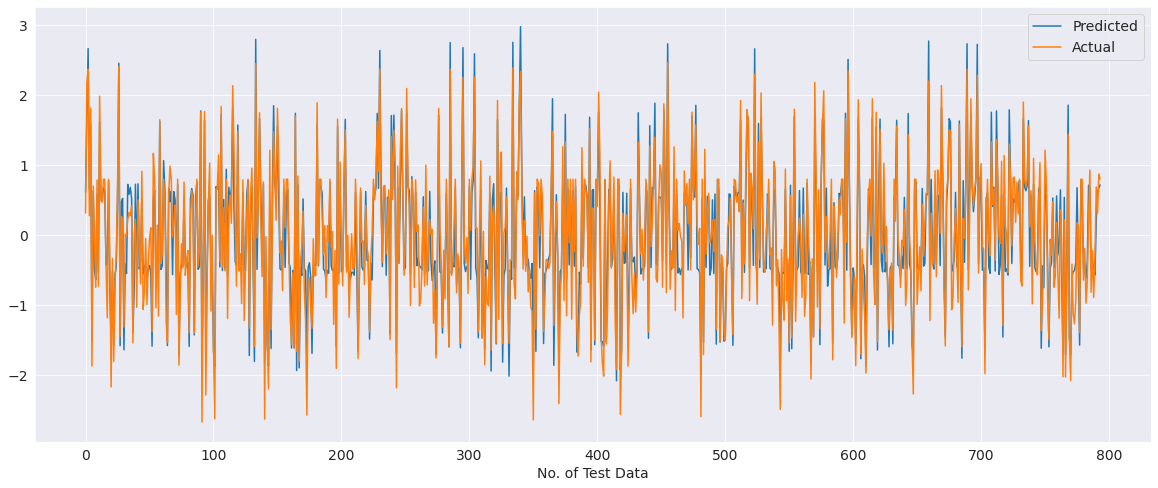

In [ ]:
# Plot the figure
plt.figure(figsize=(20,8))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No. of Test Data')
plt.show()

---

## **`DecisionTreeRegressor with Hyperparameter tuning`**

- Decision trees can be used for classification as well as regression problems. The name itself suggests that it uses a flowchart like a tree structure to show the predictions that result from a series of feature-based splits. It starts with a root node and ends with a decision made by leaves.

- Decision trees are upside down which means the root is at the top and then this root is split into various several Decision nodes. Decision trees are nothing but a bunch of if-else statements in layman terms. It checks if the condition is true and if it is then it goes to the next node attached to that decision.


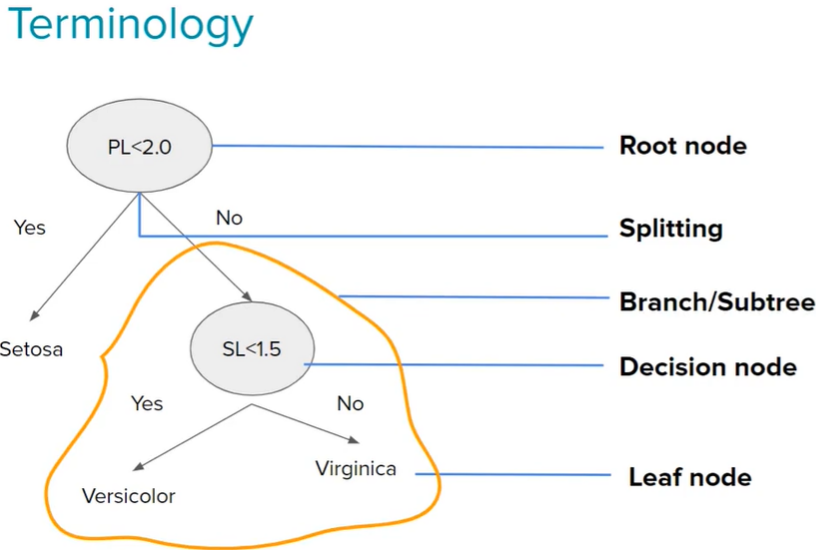

In [ ]:
# apply DecisionTreeRegressor algorithm with hyperparameter tuning as step2


# giving parameters
parameters = {
    'criterion':['squared_error'],     # 'friedman_mse', 'absolute_error'
    'splitter' :['best'],              # random
    'max_depth' :[6],                  #4,5,6,7,8,9,None
    'max_features' :[1.0]              #0.25,0.50,0.75,0.85
}

# we use gridsearchCV because the dataset is not that big so we use this not RandomizedSearchCV
dtr = GridSearchCV(DecisionTreeRegressor(), param_grid=parameters , cv=10, n_jobs=-1)

step2 = dtr

# make pipeline
pipe4 = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

# fit the pipeline on training dataset
pipe4.fit(X_train,y_train)

# predict the train and test dataset
y_pred_train = pipe4.predict(X_train)
y_pred = pipe4.predict(X_test)

# display pipeline diagram
display(pipe4)

# DecisionTreeRegressor model all output scores
print('\033[1mTraining data R2 and Adjusted R2 Score\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('R2 score',r2_score(y_train,y_pred_train))
print('Adjusted R2 score', (1-(1-r2_score(y_train,y_pred_train))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))))

print('\n')
print('\033[1mTesting data R2 and Adjusted R2 Score\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('R2 score',r2_score(y_test,y_pred))
print('Adjusted R2 score', (1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))))

print('\n')
print('\033[1mCross-validation score and best params\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print("The best parameters is", dtr.best_params_)
print('cross-validation score', dtr.best_score_)

print('\n')
print('\033[1mThe performance metrics\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('MAE',mean_absolute_error(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred)))

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_tnf', StandardScaler(),
                                                  [0, 1, 3, 5]),
                                                 ('col_tnf1',
                                                  PowerTransformer(),
                                                  [0, 1, 3]),
                                                 ('col_tnf2',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  [4, 6]),
                                                 ('col_tnf3',
                                                  OrdinalEncoder(categories=[['not_popular',
                                                                              'avg_popular',
                                                                              'popular',
                                                                              'high_popular',
                                                                              'extreme_popular']]),
                                                  [2])])),
                ('step2',
                 GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
                              n_jobs=-1,
                              param_grid={'criterion': ['squared_error'],
                                          'max_depth': [6],
                                          'max_features': [1.0],
                                          'splitter': ['best']}))])

Training data R2 and Adjusted R2 Score
-----------------------------------------
R2 score 0.9074922532210317
Adjusted R2 score 0.9072878484775175


Testing data R2 and Adjusted R2 Score
-----------------------------------------
R2 score 0.8925259571094859
Adjusted R2 score 0.8915688091448121


Cross-validation score and best params
-----------------------------------------
The best parameters is {'criterion': 'squared_error', 'max_depth': 6, 'max_features': 1.0, 'splitter': 'best'}
cross-validation score 0.8923799122054866


The performance metrics
-----------------------------------------
MAE 0.26544177776608013
MSE 0.11101277630879972
RMSE 0.33318579848006685


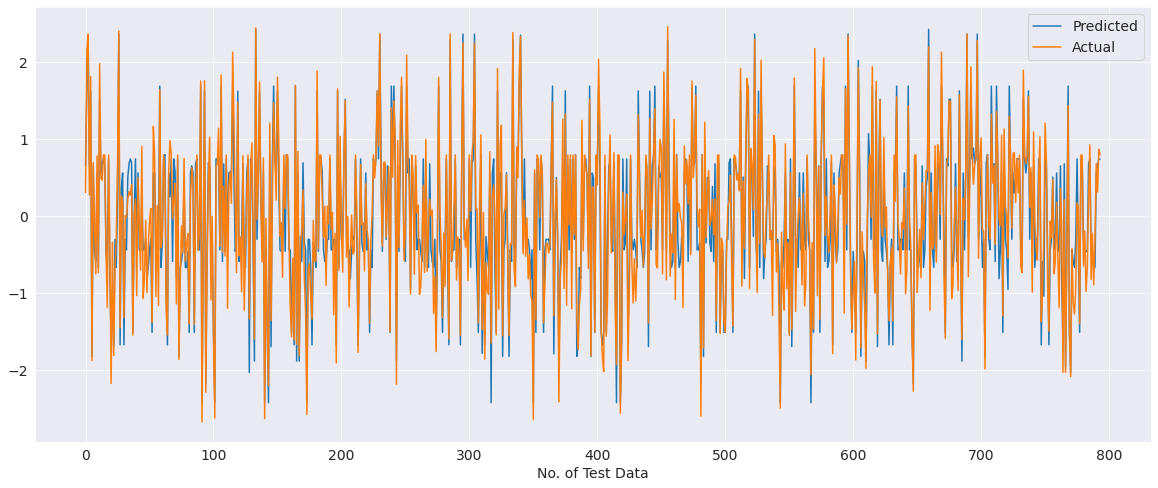

In [ ]:
# Plot the figure
plt.figure(figsize=(20,8))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No. of Test Data')
plt.show()

---

## **`RandomForestRegressor with hyperparameter tuning`**

- Random Forest is a technique that uses ensemble learning, that combines many weak classifiers to provide solutions to complex problems.

- As the name suggests random forest consists of many decision trees. Rather than depending on one tree it takes the prediction from each tree and based on the majority votes of predictions, predicts the final output.

- Random forests use the bagging method. It creates a subset of the original dataset, and the final output is based on majority ranking and hence the problem of overfitting is taken care of.

In [ ]:
# apply RandomForestRegressor algorithm with hyperparameter tuning as step2


# giving parameters
parameters = {
    'n_estimators':[58],      # 50,55,60,70,80,90,100
    'max_depth' :[6],         # 4,5,6,7,8,9,None
    'max_features' :[None],   # 'sqrt','log2'
    'max_samples' :[0.85]     # 0.40,0.50,0.60,0.70,0.75,0.85,1.0
}

# we use gridsearchCV because the dataset is not that big so we use this not RandomizedSearchCV
rfr = GridSearchCV(RandomForestRegressor(), param_grid=parameters , cv=10, n_jobs=-1)

step2 = rfr

# make pipeline
pipe5 = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

# fit the pipeline on training dataset
pipe5.fit(X_train,y_train)

# predict the train and test dataset
y_pred_train = pipe5.predict(X_train)
y_pred = pipe5.predict(X_test)

# display pipeline diagram
display(pipe5)

# RandomForestRegressor model all output scores
print('\033[1mTraining data R2 and Adjusted R2 Score\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('R2 score',r2_score(y_train,y_pred_train))
print('Adjusted R2 score', (1-(1-r2_score(y_train,y_pred_train))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))))

print('\n')
print('\033[1mTesting data R2 and Adjusted R2 Score\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('R2 score',r2_score(y_test,y_pred))
print('Adjusted R2 score', (1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))))

print('\n')
print('\033[1mCross-validation score and best params\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print("The best parameters is", rfr.best_params_)
print('cross-validation score', rfr.best_score_)

print('\n')
print('\033[1mThe performance metrics\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('MAE',mean_absolute_error(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred)))

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_tnf', StandardScaler(),
                                                  [0, 1, 3, 5]),
                                                 ('col_tnf1',
                                                  PowerTransformer(),
                                                  [0, 1, 3]),
                                                 ('col_tnf2',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  [4, 6]),
                                                 ('col_tnf3',
                                                  OrdinalEncoder(categories=[['not_popular',
                                                                              'avg_popular',
                                                                              'popular',
                                                                              'high_popular',
                                                                              'extreme_popular']]),
                                                  [2])])),
                ('step2',
                 GridSearchCV(cv=10, estimator=RandomForestRegressor(),
                              n_jobs=-1,
                              param_grid={'max_depth': [6],
                                          'max_features': [None],
                                          'max_samples': [0.85],
                                          'n_estimators': [58]}))])

Training data R2 and Adjusted R2 Score
-----------------------------------------
R2 score 0.9108767287780115
Adjusted R2 score 0.9106798023580134


Testing data R2 and Adjusted R2 Score
-----------------------------------------
R2 score 0.8977809492242889
Adjusted R2 score 0.8968706014438436


Cross-validation score and best params
-----------------------------------------
The best parameters is {'max_depth': 6, 'max_features': None, 'max_samples': 0.85, 'n_estimators': 58}
cross-validation score 0.8973411472404343


The performance metrics
-----------------------------------------
MAE 0.2613809863618441
MSE 0.10558475621710726
RMSE 0.3249380805893752


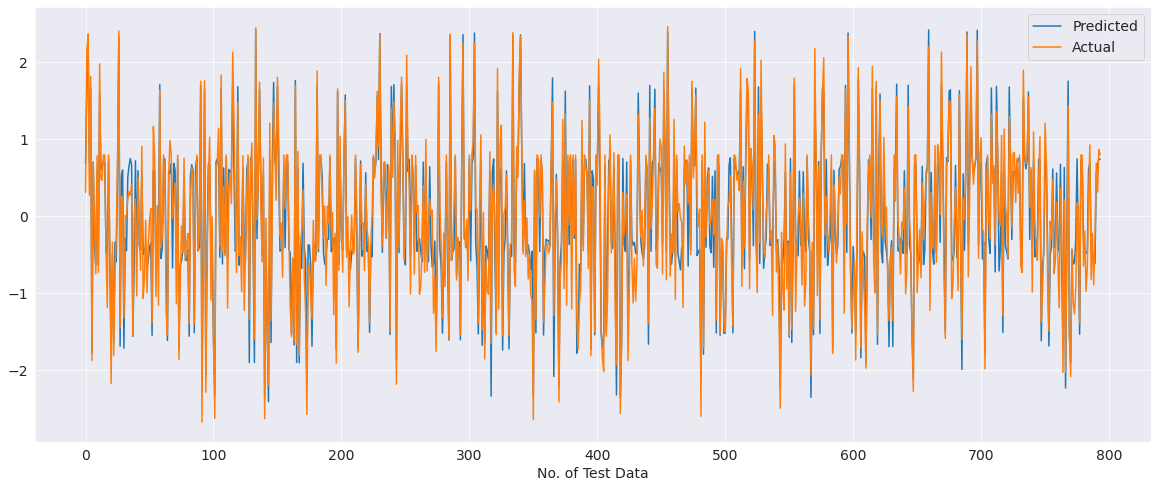

In [ ]:
# Plot the figure
plt.figure(figsize=(20,8))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No. of Test Data')
plt.show()

## **`AdaBoostRegressor with hyperparameter tuning`**

- Adaboost (Adaptive Boosting) is a type of ensemble learning method used for classification and regression tasks. It works by combining several weak learners (simple models with a slightly better performance than random guessing) to create a strong learner.

- In Adaboost, the algorithm learns Sequential and iteratively by adjusting the weights of the instances in the dataset. During each iteration, the algorithm assigns higher weights to instances that were misclassified by the previous weak learner. Then, the algorithm trains a new weak learner on the updated dataset with the weighted instances. This process is repeated until a predefined number of iterations is reached or until the training error is minimized.

- Once all weak learners are trained, the final prediction is made by combining the predictions of each weak learner. The final prediction is a weighted sum of the individual predictions, where the weight of each weak learner depends on its accuracy.

In [ ]:
# apply AdaBoostRegressor algorithm with hyperparameter tuning as step2


# giving parameters
parameters = {
    'n_estimators' :[200],                         # 50,80,120,160,180,200,220,240
    'learning_rate' :[0.01],                       # 0.0001,0.001,0.01,0.1,1
    'loss' :['linear']                             # 'linear', 'square', 'exponential'
}

# we use gridsearchCV because the dataset is not that big so we use this not RandomizedSearchCV
abr = GridSearchCV(AdaBoostRegressor(), param_grid=parameters , cv=10, n_jobs=-1)

step2 = abr

# make pipeline
pipe6 = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

# fit the pipeline on training dataset
pipe6.fit(X_train,y_train)

# predict the train and test dataset
y_pred_train = pipe6.predict(X_train)
y_pred = pipe6.predict(X_test)

# display pipeline diagram
display(pipe6)

# AdaBoostRegressor model all output scores
print('\033[1mTraining data R2 and Adjusted R2 Score\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('R2 score',r2_score(y_train,y_pred_train))
print('Adjusted R2 score', (1-(1-r2_score(y_train,y_pred_train))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))))

print('\n')
print('\033[1mTesting data R2 and Adjusted R2 Score\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('R2 score',r2_score(y_test,y_pred))
print('Adjusted R2 score', (1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))))

print('\n')
print('\033[1mCross-validation score and best params\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print("The best parameters is", abr.best_params_)
print('cross-validation score', abr.best_score_)

print('\n')
print('\033[1mThe performance metrics\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('MAE',mean_absolute_error(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred)))

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_tnf', StandardScaler(),
                                                  [0, 1, 3, 5]),
                                                 ('col_tnf1',
                                                  PowerTransformer(),
                                                  [0, 1, 3]),
                                                 ('col_tnf2',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  [4, 6]),
                                                 ('col_tnf3',
                                                  OrdinalEncoder(categories=[['not_popular',
                                                                              'avg_popular',
                                                                              'popular',
                                                                              'high_popular',
                                                                              'extreme_popular']]),
                                                  [2])])),
                ('step2',
                 GridSearchCV(cv=10, estimator=AdaBoostRegressor(), n_jobs=-1,
                              param_grid={'learning_rate': [0.01],
                                          'loss': ['linear'],
                                          'n_estimators': [200]}))])

Training data R2 and Adjusted R2 Score
-----------------------------------------
R2 score 0.8925623097265709
Adjusted R2 score 0.8923249158402344


Testing data R2 and Adjusted R2 Score
-----------------------------------------
R2 score 0.8949891895130604
Adjusted R2 score 0.8940539787326424


Cross-validation score and best params
-----------------------------------------
The best parameters is {'learning_rate': 0.01, 'loss': 'linear', 'n_estimators': 200}
cross-validation score 0.8901277987354534


The performance metrics
-----------------------------------------
MAE 0.26979427637713876
MSE 0.1084684385276931
RMSE 0.32934546987577207


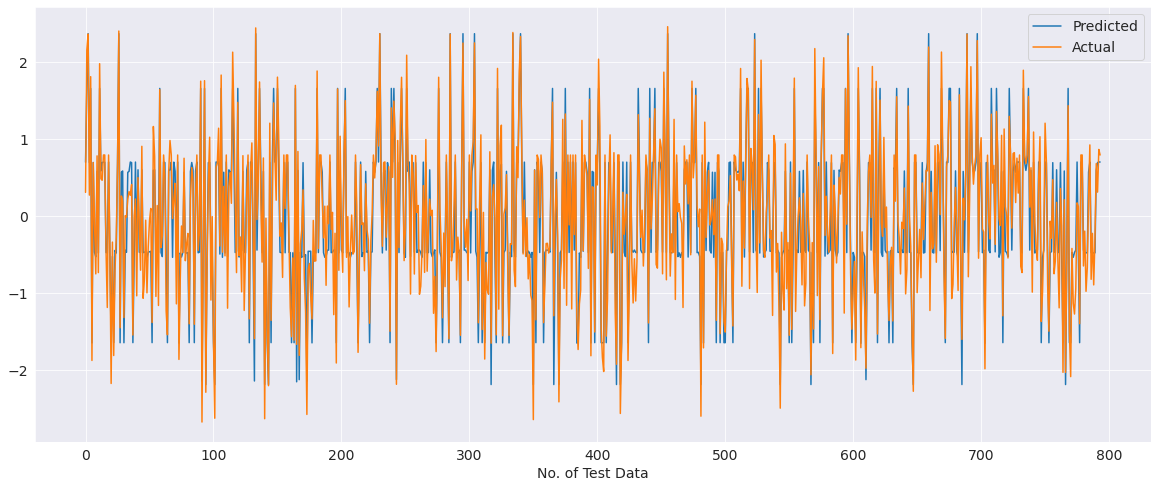

In [ ]:
# Plot the figure
plt.figure(figsize=(20,8))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No. of Test Data')
plt.show()

## **`GradientBoostingRegressor with hyperparameter tuning`**

- Gradient Boosting is a machine learning algorithm that is widely used for both regression and classification problems. It is an ensemble learning algorithm that combines multiple weak models to create a strong model. Gradient Boosting works by fitting a sequence of weak models to the residuals of the previous model. The weak models are typically decision trees.

- The algorithm starts by fitting a simple model to the data, such as a decision tree with a small number of levels. The next model is then fit to the residual errors of the first model. This process is repeated, with each new model being fit to the residuals of the previous model, until the residuals cannot be improved further or a maximum number of iterations is reached.

- Gradient Boosting differs from other ensemble learning methods, such as Random Forest, in that it does not rely on randomization to create diversity among the models. Instead, it relies on optimizing the loss function directly by updating the model parameters in the direction of the negative gradient of the loss function. This means that each new model is fit to the errors of the previous model, rather than the data directly.

In [ ]:
# apply GradientBoostingRegressor algorithm with hyperparameter tuning as step2


# giving parameters
parameters = {
    'n_estimators' :[160],                                                        # 60,100,140,160,180,200,220
    'learning_rate' :[0.05],                                                      # 0.001,0.01,0.05,0.1,1.0
    'max_depth' :[7],                                                             # 4,5,6,7,8
    'max_leaf_nodes' :[8]                                                         # 4,6,8,12,16,20,24,32,None
    #'loss' :['squared_error']                                                    # 'squared_error', 'absolute_error', 'huber'
}

# we use gridsearchCV because the dataset is not that big so we use this not RandomizedSearchCV
gbr = GridSearchCV(GradientBoostingRegressor(), param_grid=parameters , cv=10, n_jobs=-1)

step2 = gbr


# make pipeline
pipe7 = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

# fit the pipeline on training dataset
pipe7.fit(X_train,y_train)

# predict the train and test dataset
y_pred_train = pipe7.predict(X_train)
y_pred = pipe7.predict(X_test)

# display pipeline diagram
display(pipe7)

# GradientBoostingRegressor model all output scores
print('\033[1mTraining data R2 and Adjusted R2 Score\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('R2 score',r2_score(y_train,y_pred_train))
print('Adjusted R2 score', (1-(1-r2_score(y_train,y_pred_train))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))))

print('\n')
print('\033[1mTesting data R2 and Adjusted R2 Score\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('R2 score',r2_score(y_test,y_pred))
print('Adjusted R2 score', (1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))))

print('\n')
print('\033[1mCross-validation score and best params\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print("The best parameters is", gbr.best_params_)
print('cross-validation score', gbr.best_score_)

print('\n')
print('\033[1mThe performance metrics\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('MAE',mean_absolute_error(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred)))

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_tnf', StandardScaler(),
                                                  [0, 1, 3, 5]),
                                                 ('col_tnf1',
                                                  PowerTransformer(),
                                                  [0, 1, 3]),
                                                 ('col_tnf2',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  [4, 6]),
                                                 ('col_tnf3',
                                                  OrdinalEncoder(categories=[['not_popular',
                                                                              'avg_popular',
                                                                              'popular',
                                                                              'high_popular',
                                                                              'extreme_popular']]),
                                                  [2])])),
                ('step2',
                 GridSearchCV(cv=10, estimator=GradientBoostingRegressor(),
                              n_jobs=-1,
                              param_grid={'learning_rate': [0.05],
                                          'max_depth': [7],
                                          'max_leaf_nodes': [8],
                                          'n_estimators': [160]}))])

Training data R2 and Adjusted R2 Score
-----------------------------------------
R2 score 0.9095741018743323
Adjusted R2 score 0.909374297175191


Testing data R2 and Adjusted R2 Score
-----------------------------------------
R2 score 0.8970023125808251
Adjusted R2 score 0.8960850303773464


Cross-validation score and best params
-----------------------------------------
The best parameters is {'learning_rate': 0.05, 'max_depth': 7, 'max_leaf_nodes': 8, 'n_estimators': 160}
cross-validation score 0.896679420697937


The performance metrics
-----------------------------------------
MAE 0.26261089777841445
MSE 0.10638903056281819
RMSE 0.3261733136889316


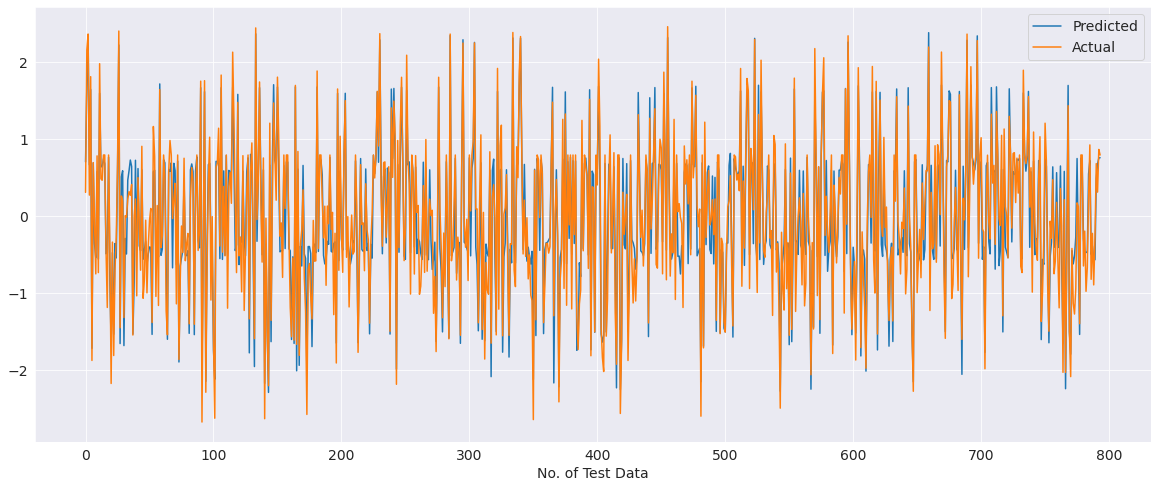

In [ ]:
# Plot the figure
plt.figure(figsize=(20,8))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No. of Test Data')
plt.show()

## **`XGBRegressor with hyperparameter tuning`**

- XGBoost (Extreme Gradient Boosting) is a popular machine learning algorithm used for both regression and classification problems. XGBoost works by iteratively adding decision trees to the model while focusing on the misclassified instances from the previous iterations. During each iteration, XGBoost adjusts the weights of the instances that were misclassified in the previous iteration to make them more important in the next iteration. This approach allows XGBoost to correct its previous mistakes and improve the accuracy of its predictions with each iteration.

- One of the unique features of XGBoost is its regularization techniques, which help to prevent overfitting. XGBoost allows users to tune the model parameters such as the learning rate, maximum depth of the tree, and number of trees in the ensemble to achieve the best performance. Additionally, XGBoost provides a built-in cross-validation framework that enables users to evaluate the performance of the model and tune the hyperparameters.

In [ ]:
# apply XGBRegressor algorithm with hyperparameter tuning as step2


# giving parameters
parameters = {
    'n_estimators' :[170],                                                    # 150,160,170,180,200
    'learning_rate' :[0.05],                                                  # 0.001,0.005,0.01,0.05,0.1
    'max_depth' :[4]                                                          # 3,4,5,6,7,8
}

# we use gridsearchCV because the dataset is not that big so we use this not RandomizedSearchCV
xgbr = GridSearchCV(XGBRegressor(objective='reg:squarederror'), param_grid=parameters , cv=10, n_jobs=-1)

step2 = xgbr

# make pipeline
pipe8 = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

# fit the pipeline on training dataset
pipe8.fit(X_train,y_train)

# predict the train and test dataset
y_pred_train = pipe8.predict(X_train)
y_pred = pipe8.predict(X_test)

# display pipeline diagram
display(pipe8)

# GradientBoostingRegressor model all output scores
print('\033[1mTraining data R2 and Adjusted R2 Score\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('R2 score',r2_score(y_train,y_pred_train))
print('Adjusted R2 score', (1-(1-r2_score(y_train,y_pred_train))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))))

print('\n')
print('\033[1mTesting data R2 and Adjusted R2 Score\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('R2 score',r2_score(y_test,y_pred))
print('Adjusted R2 score', (1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))))

print('\n')
print('\033[1mCross-validation score and best params\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print("The best parameters is", xgbr.best_params_)
print('cross-validation score', xgbr.best_score_)

print('\n')
print('\033[1mThe performance metrics\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('MAE',mean_absolute_error(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred)))

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_tnf', StandardScaler(),
                                                  [0, 1, 3, 5]),
                                                 ('col_tnf1',
                                                  PowerTransformer(),
                                                  [0, 1, 3]),
                                                 ('col_tnf2',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  [4, 6]),
                                                 ('col_tnf3',
                                                  OrdinalEncoder(categories=[['not_popular',
                                                                              'avg_popular',
                                                                              'popular',
                                                                              'high_popular',
                                                                              'extreme_popular']]),
                                                  [2])])),
                ('step2'...
                                                     learning_rate=None,
                                                     max_bin=None,
                                                     max_cat_threshold=None,
                                                     max_cat_to_onehot=None,
                                                     max_delta_step=None,
                                                     max_depth=None,
                                                     max_leaves=None,
                                                     min_child_weight=None,
                                                     missing=nan,
                                                     monotone_constraints=None,
                                                     n_estimators=100,
                                                     n_jobs=None,
                                                     num_parallel_tree=None,
                                                     predictor=None,
                                                     random_state=None, ...),
                              n_jobs=-1,
                              param_grid={'learning_rate': [0.05],
                                          'max_depth': [4],
                                          'n_estimators': [170]}))])

Training data R2 and Adjusted R2 Score
-----------------------------------------
R2 score 0.9153880712160745
Adjusted R2 score 0.9152011130400999


Testing data R2 and Adjusted R2 Score
-----------------------------------------
R2 score 0.8972178595451197
Adjusted R2 score 0.896302496971094


Cross-validation score and best params
-----------------------------------------
The best parameters is {'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 170}
cross-validation score 0.8967664273125708


The performance metrics
-----------------------------------------
MAE 0.2607432079113299
MSE 0.10616638641277297
RMSE 0.32583183762912576


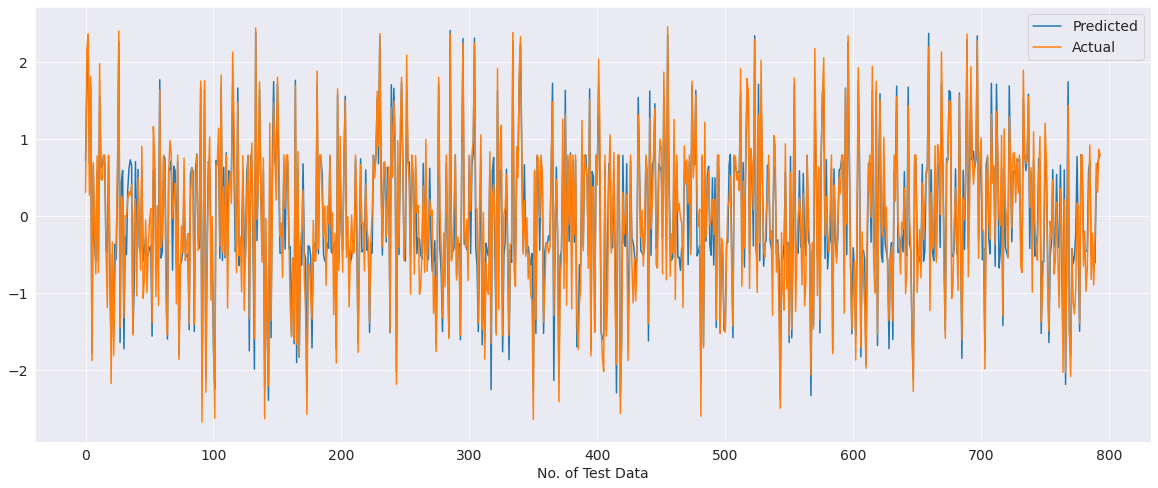

In [ ]:
# Plot the figure
plt.figure(figsize=(20,8))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No. of Test Data')
plt.show()

## **`VotingRegressor`**

In [ ]:
# apply VotingRegressor algorithm with hyperparameter tuning as step2

from sklearn.ensemble import VotingRegressor

lr = LinearRegression()
rf = RandomForestRegressor(n_estimators=58,random_state=0,max_samples=0.85,bootstrap=True,max_features=None,max_depth=6)
xgb = XGBRegressor(objective='reg:squarederror',n_estimators=170,learning_rate=0.05,max_depth=4)

estimators = [('lr', lr), ('rf', rf), ('xgb',xgb)]

param_grid = {
    'weights': [[1,3,2]]
}

# we use gridsearchCV because the dataset is not that big so we use this not RandomizedSearchCV
vr = GridSearchCV(VotingRegressor(estimators),param_grid=param_grid, cv=10, n_jobs=-1)


step2 = vr

# make pipeline
pipe9 = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

# fit the pipeline on training dataset
pipe9.fit(X_train,y_train)

# predict the train and test dataset
y_pred_train = pipe9.predict(X_train)
y_pred = pipe9.predict(X_test)

# display pipeline diagram
display(pipe9)

# VotingRegressor model all output scores
print('\033[1mTraining data R2 and Adjusted R2 Score\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('R2 score',r2_score(y_train,y_pred_train))
print('Adjusted R2 score', (1-(1-r2_score(y_train,y_pred_train))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))))

print('\n')
print('\033[1mTesting data R2 and Adjusted R2 Score\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('R2 score',r2_score(y_test,y_pred))
print('Adjusted R2 score', (1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))))

print('\n')
print('\033[1mCross-validation score and best params\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print("The best parameters is", vr.best_params_)
print('cross-validation score', vr.best_score_)

print('\n')
print('\033[1mThe performance metrics\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('MAE',mean_absolute_error(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred)))

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_tnf', StandardScaler(),
                                                  [0, 1, 3, 5]),
                                                 ('col_tnf1',
                                                  PowerTransformer(),
                                                  [0, 1, 3]),
                                                 ('col_tnf2',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  [4, 6]),
                                                 ('col_tnf3',
                                                  OrdinalEncoder(categories=[['not_popular',
                                                                              'avg_popular',
                                                                              'popular',
                                                                              'high_popular',
                                                                              'extreme_popular']]),
                                                  [2])])),
                ('step2'...
                                                                                  interaction_constraints=None,
                                                                                  learning_rate=0.05,
                                                                                  max_bin=None,
                                                                                  max_cat_threshold=None,
                                                                                  max_cat_to_onehot=None,
                                                                                  max_delta_step=None,
                                                                                  max_depth=4,
                                                                                  max_leaves=None,
                                                                                  min_child_weight=None,
                                                                                  missing=nan,
                                                                                  monotone_constraints=None,
                                                                                  n_estimators=170,
                                                                                  n_jobs=None,
                                                                                  num_parallel_tree=None,
                                                                                  predictor=None,
                                                                                  random_state=None, ...))]),
                              n_jobs=-1,
                              param_grid={'weights': [[1, 3, 2]]}))])

Training data R2 and Adjusted R2 Score
-----------------------------------------
R2 score 0.9109658994379364
Adjusted R2 score 0.9107691700490682


Testing data R2 and Adjusted R2 Score
-----------------------------------------
R2 score 0.898176176337274
Adjusted R2 score 0.8972693483911682


Cross-validation score and best params
-----------------------------------------
The best parameters is {'weights': [1, 3, 2]}
cross-validation score 0.8977736689321212


The performance metrics
-----------------------------------------
MAE 0.2615768200358902
MSE 0.1051765156977692
RMSE 0.32430929018110044


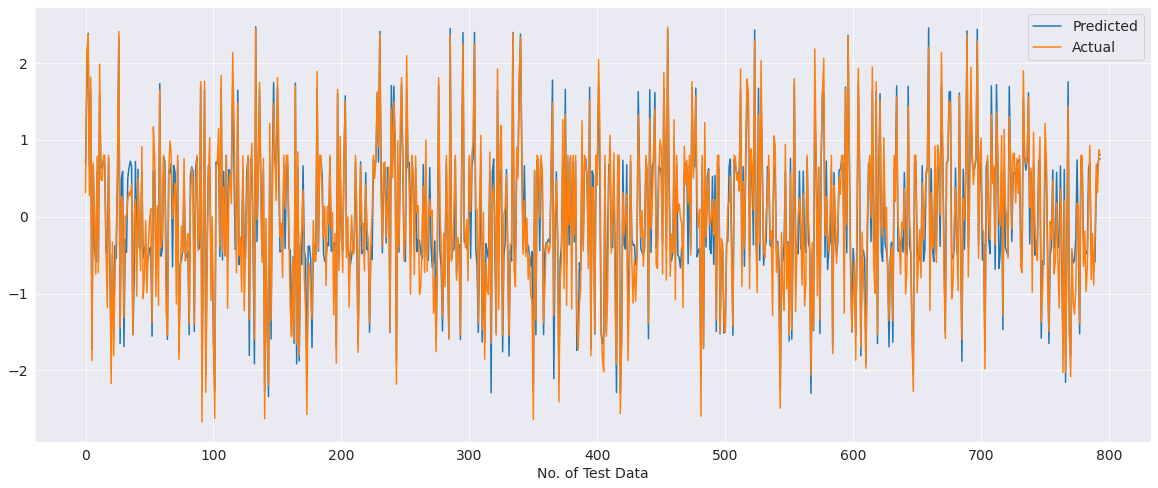

In [ ]:
# Plot the figure
plt.figure(figsize=(20,8))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No. of Test Data')
plt.show()

### **observations :-**

- After performing hyperparameter tuning on different regression models, we found that the voting regressor model slightly outperformed the random forest regressor, although the difference was not significant. Both models showed strong performance and were very close in terms of their predictive accuracy.

## **`StackingRegressor`**

In [ ]:
# apply StackingRegressor algorithm as step2


from sklearn.ensemble import StackingRegressor

lr = LinearRegression()
rf = RandomForestRegressor(n_estimators=58,random_state=0,max_samples=0.85,bootstrap=True,max_features=None,max_depth=6)
xgb = XGBRegressor(objective='reg:squarederror',n_estimators=170,learning_rate=0.05,max_depth=4)

estimators = [('lr', lr), ('rf', rf), ('xgb',xgb)]

step2 = StackingRegressor(estimators=estimators, final_estimator=Ridge(alpha=0.01),cv=10)

# make pipeline
pipe10 = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

# fit the pipeline on training dataset
pipe10.fit(X_train,y_train)

# predict the train and test dataset
y_pred_train = pipe10.predict(X_train)
y_pred = pipe10.predict(X_test)

# display pipeline diagram
display(pipe10)

# StackingRegressor model all output scores
print('\033[1mTraining data R2 and Adjusted R2 Score\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('R2 score',r2_score(y_train,y_pred_train))
print('Adjusted R2 score', (1-(1-r2_score(y_train,y_pred_train))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))))

print('\n')
print('\033[1mTesting data R2 and Adjusted R2 Score\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('R2 score',r2_score(y_test,y_pred))
print('Adjusted R2 score', (1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))))

# print('\n')
# print('\033[1mCross-validation score and best params\033[0m')
# print('\033[1m' + '-----------------------------------------' + '\033[0m')
# print("The best parameters is", xgbr.best_params_)
# print('cross-validation score', xgbr.best_score_)

print('\n')
print('\033[1mThe performance metrics\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('MAE',mean_absolute_error(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred)))

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_tnf', StandardScaler(),
                                                  [0, 1, 3, 5]),
                                                 ('col_tnf1',
                                                  PowerTransformer(),
                                                  [0, 1, 3]),
                                                 ('col_tnf2',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  [4, 6]),
                                                 ('col_tnf3',
                                                  OrdinalEncoder(categories=[['not_popular',
                                                                              'avg_popular',
                                                                              'popular',
                                                                              'high_popular',
                                                                              'extreme_popular']]),
                                                  [2])])),
                ('step2'...
                                                             importance_type=None,
                                                             interaction_constraints=None,
                                                             learning_rate=0.05,
                                                             max_bin=None,
                                                             max_cat_threshold=None,
                                                             max_cat_to_onehot=None,
                                                             max_delta_step=None,
                                                             max_depth=4,
                                                             max_leaves=None,
                                                             min_child_weight=None,
                                                             missing=nan,
                                                             monotone_constraints=None,
                                                             n_estimators=170,
                                                             n_jobs=None,
                                                             num_parallel_tree=None,
                                                             predictor=None,
                                                             random_state=None, ...))],
                                   final_estimator=Ridge(alpha=0.01)))])

Training data R2 and Adjusted R2 Score
-----------------------------------------
R2 score 0.9122013889771443
Adjusted R2 score 0.91200738952097


Testing data R2 and Adjusted R2 Score
-----------------------------------------
R2 score 0.8981194425413759
Adjusted R2 score 0.8972121093324568


The performance metrics
-----------------------------------------
MAE 0.26101812705688876
MSE 0.10523511753337328
RMSE 0.3243996262842688


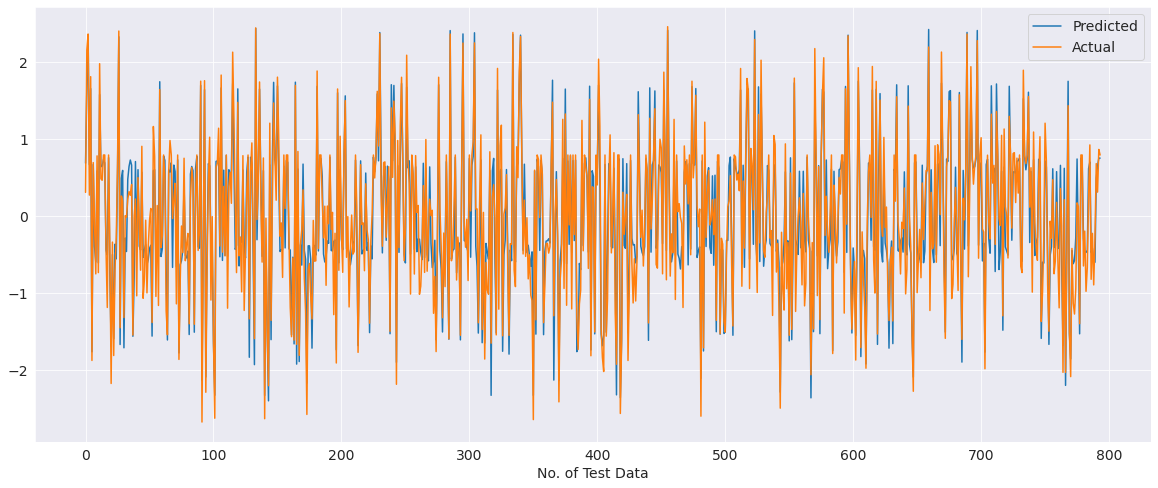

In [ ]:
# Plot the figure
plt.figure(figsize=(20,8))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No. of Test Data')
plt.show()

#**Conclusion :-**


- After evaluating multiple regression models on the dataset, Random Forest Regressor perform better than other models. They have higher R2 scores, lower error metrics, and can generalize well on unseen data.

- Linear Regressor and Lasso Regressor have slightly lower performance metrics compared to Random Forest Regressor and Gradient Boosting Regressor.

- Decision Tree Regressor has a lower R2 score, higher error metrics, and little bit overfits the data comparing to the other best models, indicating it's not the best model to use.

- Gradient Boosting Regressor and XGBoost Regressor are high-performing algorithms that achieved impressive results in our evaluation. However, even with their strong performance, these boosting models were not able to outperform the Random Forest algorithm on this particular dataset. In other words, Random Forest Regressor still achieved the best overall performance among all the models we tested.

- Voting Regressor and Stacking Regressor are ensemble techniques that combine multiple models to make predictions. The Voting Regressor model showed excellent performance, outperforming all other models. Although the difference in performance between this two models voting regressor and random forest regressor was very small, we ultimately chose to use the random forest regressor in our scenario. This decision was based on the fact that the random forest model is generally more interpretable and easier to explain to stakeholders, compared to the voting regressor which aggregates predictions from multiple models. Additionally, the random forest algorithm has been shown to perform well in a variety of regression tasks and can handle non-linear relationships between features and the target variable, making it a more robust choice for our use case.

**Therefore, based on the evaluation results, the Random Forest Regressor was chosen as the best model to achieve our objective. Also in future we can try implementing some other optimising techniques to wind up with better results.**

### **🥇RandomForest with hyperparameter tuning🥇**

`Training data R2 and Adjusted R2 Score`
- R2 score 0.9108
- Adjusted R2 score 0.9106


`Testing data R2 and Adjusted R2 Score`
- R2 score 0.8977
- Adjusted R2 score 0.8968


`Cross-validation score`

- 0.8974


`The performance metrics`
- MAE 0.2613
- MSE 0.1055
- RMSE 0.3249

*At the end a word of Thankyou to you for going through project till the very end, genuinely appreciate your time. Happy Learning!*